In [1]:
import numpy as np
import pandas as pd
import warnings
import calendar
warnings.filterwarnings('ignore')

# import libraties
import matplotlib.pyplot as plt
import seaborn as sns
#Suppressing scientific notation to float only 
pd.options.display.float_format = '{:,.2f}'.format

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
#Reading file for Gaming Accessory
GamingAccessory = pd.read_csv('GamingAccessory.csv')
GamingAccessory.head()

,Unnamed: 0,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per,PO_lag_1_per-1,PO_lag_1_per-2,PO_lag_1_per-3,GMV_lag_1_per,GMV_lag_2_per,GMV_lag_3_per
0,1555,2015-10-04,2015,10,"1,408,216,975,064,600.00","1,408,216,975,064,600.00","3,075.00",1,0,0,...,nan,0.12,0.06,0.18,-0.26,-0.16,-0.34,0.12,0.06,0.18
1,1556,2015-10-14,2015,10,"1,416,985,339,691,600.00","1,416,985,339,691,600.00","2,750.00",1,0,0,...,nan,-0.05,0.05,-0.01,0.14,-0.10,0.02,-0.05,0.05,-0.01
2,1557,2015-10-15,2015,10,"1,417,669,228,375,400.00","1,417,669,228,375,400.00","2,899.00",1,0,0,...,nan,0.11,0.05,0.05,-0.21,-0.10,-0.12,0.11,0.05,0.05
3,1558,2015-10-17,2015,10,"1,419,414,998,353,400.00","1,419,414,998,353,400.00","2,609.00",1,0,0,...,0.19,-0.06,-0.05,-0.13,0.13,0.11,0.39,-0.06,-0.05,-0.13
4,1559,2015-10-26,2015,10,"1,427,167,582,532,600.00","1,427,167,582,532,600.00","2,772.00",1,0,0,...,-0.01,0.01,-0.08,-0.10,-0.02,0.23,0.33,0.01,-0.08,-0.10


In [3]:
GamingAccessory = GamingAccessory.drop(['Unnamed: 0'], axis=1)
GamingAccessory.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per,PO_lag_1_per-1,PO_lag_1_per-2,PO_lag_1_per-3,GMV_lag_1_per,GMV_lag_2_per,GMV_lag_3_per
0,2015-10-04,2015,10,"1,408,216,975,064,600.00","1,408,216,975,064,600.00","3,075.00",1,0,0,COD,...,nan,0.12,0.06,0.18,-0.26,-0.16,-0.34,0.12,0.06,0.18
1,2015-10-14,2015,10,"1,416,985,339,691,600.00","1,416,985,339,691,600.00","2,750.00",1,0,0,COD,...,nan,-0.05,0.05,-0.01,0.14,-0.10,0.02,-0.05,0.05,-0.01
2,2015-10-15,2015,10,"1,417,669,228,375,400.00","1,417,669,228,375,400.00","2,899.00",1,0,0,Prepaid,...,nan,0.11,0.05,0.05,-0.21,-0.10,-0.12,0.11,0.05,0.05
3,2015-10-17,2015,10,"1,419,414,998,353,400.00","1,419,414,998,353,400.00","2,609.00",1,0,0,Prepaid,...,0.19,-0.06,-0.05,-0.13,0.13,0.11,0.39,-0.06,-0.05,-0.13
4,2015-10-26,2015,10,"1,427,167,582,532,600.00","1,427,167,582,532,600.00","2,772.00",1,0,0,Prepaid,...,-0.01,0.01,-0.08,-0.10,-0.02,0.23,0.33,0.01,-0.08,-0.10


In [4]:
# Drop lag, MA and GMV columns
GamingAccessory = GamingAccessory.drop(['inc_LP_MA1','inc_LP_MA2','inc_LP_MA3','inc_PO_MA1','inc_PO_MA2','inc_PO_MA3','LP_lag_1_per',
           'LP_lag_2_per','LP_lag_3_per','PO_lag_1_per-1','PO_lag_1_per-2','PO_lag_1_per-1','GMV_lag_1_per','GMV_lag_2_per',
           'GMV_lag_3_per','PO_lag_1_per-3'], axis=1)
GamingAccessory.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,month_date,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,2015-10-04,2015,10,"1,408,216,975,064,600.00","1,408,216,975,064,600.00","3,075.00",1,0,0,COD,...,2015-10-04-10,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00
1,2015-10-14,2015,10,"1,416,985,339,691,600.00","1,416,985,339,691,600.00","2,750.00",1,0,0,COD,...,2015-10-14-10,"20,812,731.13","42,753,560.50","286,794,058.40","11,665,414.50","82,549,569.75","23,620,634.40","108,139,877.25",0.00,0.00
2,2015-10-15,2015,10,"1,417,669,228,375,400.00","1,417,669,228,375,400.00","2,899.00",1,0,0,Prepaid,...,2015-10-15-10,"24,281,519.65","49,879,153.92","334,593,068.13","13,609,650.25","96,307,831.38","27,557,406.80","126,163,190.13",0.00,0.00
3,2015-10-17,2015,10,"1,419,414,998,353,400.00","1,419,414,998,353,400.00","2,609.00",1,0,0,Prepaid,...,2015-10-17-10,"26,015,913.91","53,441,950.62","358,492,572.99","14,581,768.12","103,186,962.19","29,525,793.00","135,174,846.56",0.00,0.00
4,2015-10-26,2015,10,"1,427,167,582,532,600.00","1,427,167,582,532,600.00","2,772.00",1,0,0,Prepaid,...,2015-10-26-10,"26,883,111.04","55,223,348.98","370,442,325.43","15,067,827.06","106,626,527.60","30,509,986.10","139,680,674.78",0.00,0.00


In [5]:
# Drop categorical variable columns
GamingAccessory = GamingAccessory.drop(['Year','Month','order_id','order_item_id','order_date'], axis=1)
GamingAccessory.head()

,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,...,month_date,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,"3,075.00",1,0,0,COD,9,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,2015-10-04-10,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00
1,"2,750.00",1,0,0,COD,7,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,2015-10-14-10,"20,812,731.13","42,753,560.50","286,794,058.40","11,665,414.50","82,549,569.75","23,620,634.40","108,139,877.25",0.00,0.00
2,"2,899.00",1,0,0,Prepaid,5,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,2015-10-15-10,"24,281,519.65","49,879,153.92","334,593,068.13","13,609,650.25","96,307,831.38","27,557,406.80","126,163,190.13",0.00,0.00
3,"2,609.00",1,0,0,Prepaid,5,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,2015-10-17-10,"26,015,913.91","53,441,950.62","358,492,572.99","14,581,768.12","103,186,962.19","29,525,793.00","135,174,846.56",0.00,0.00
4,"2,772.00",1,0,0,Prepaid,5,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,2015-10-26-10,"26,883,111.04","55,223,348.98","370,442,325.43","15,067,827.06","106,626,527.60","30,509,986.10","139,680,674.78",0.00,0.00


In [6]:
# Drop categorical variable columns
GamingAccessory = GamingAccessory.drop(['month_date'], axis=1)
GamingAccessory.head()

,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,...,ItemType,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,"3,075.00",1,0,0,COD,9,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,Luxury,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00
1,"2,750.00",1,0,0,COD,7,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,Luxury,"20,812,731.13","42,753,560.50","286,794,058.40","11,665,414.50","82,549,569.75","23,620,634.40","108,139,877.25",0.00,0.00
2,"2,899.00",1,0,0,Prepaid,5,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,Luxury,"24,281,519.65","49,879,153.92","334,593,068.13","13,609,650.25","96,307,831.38","27,557,406.80","126,163,190.13",0.00,0.00
3,"2,609.00",1,0,0,Prepaid,5,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,Luxury,"26,015,913.91","53,441,950.62","358,492,572.99","14,581,768.12","103,186,962.19","29,525,793.00","135,174,846.56",0.00,0.00
4,"2,772.00",1,0,0,Prepaid,5,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,Luxury,"26,883,111.04","55,223,348.98","370,442,325.43","15,067,827.06","106,626,527.60","30,509,986.10","139,680,674.78",0.00,0.00


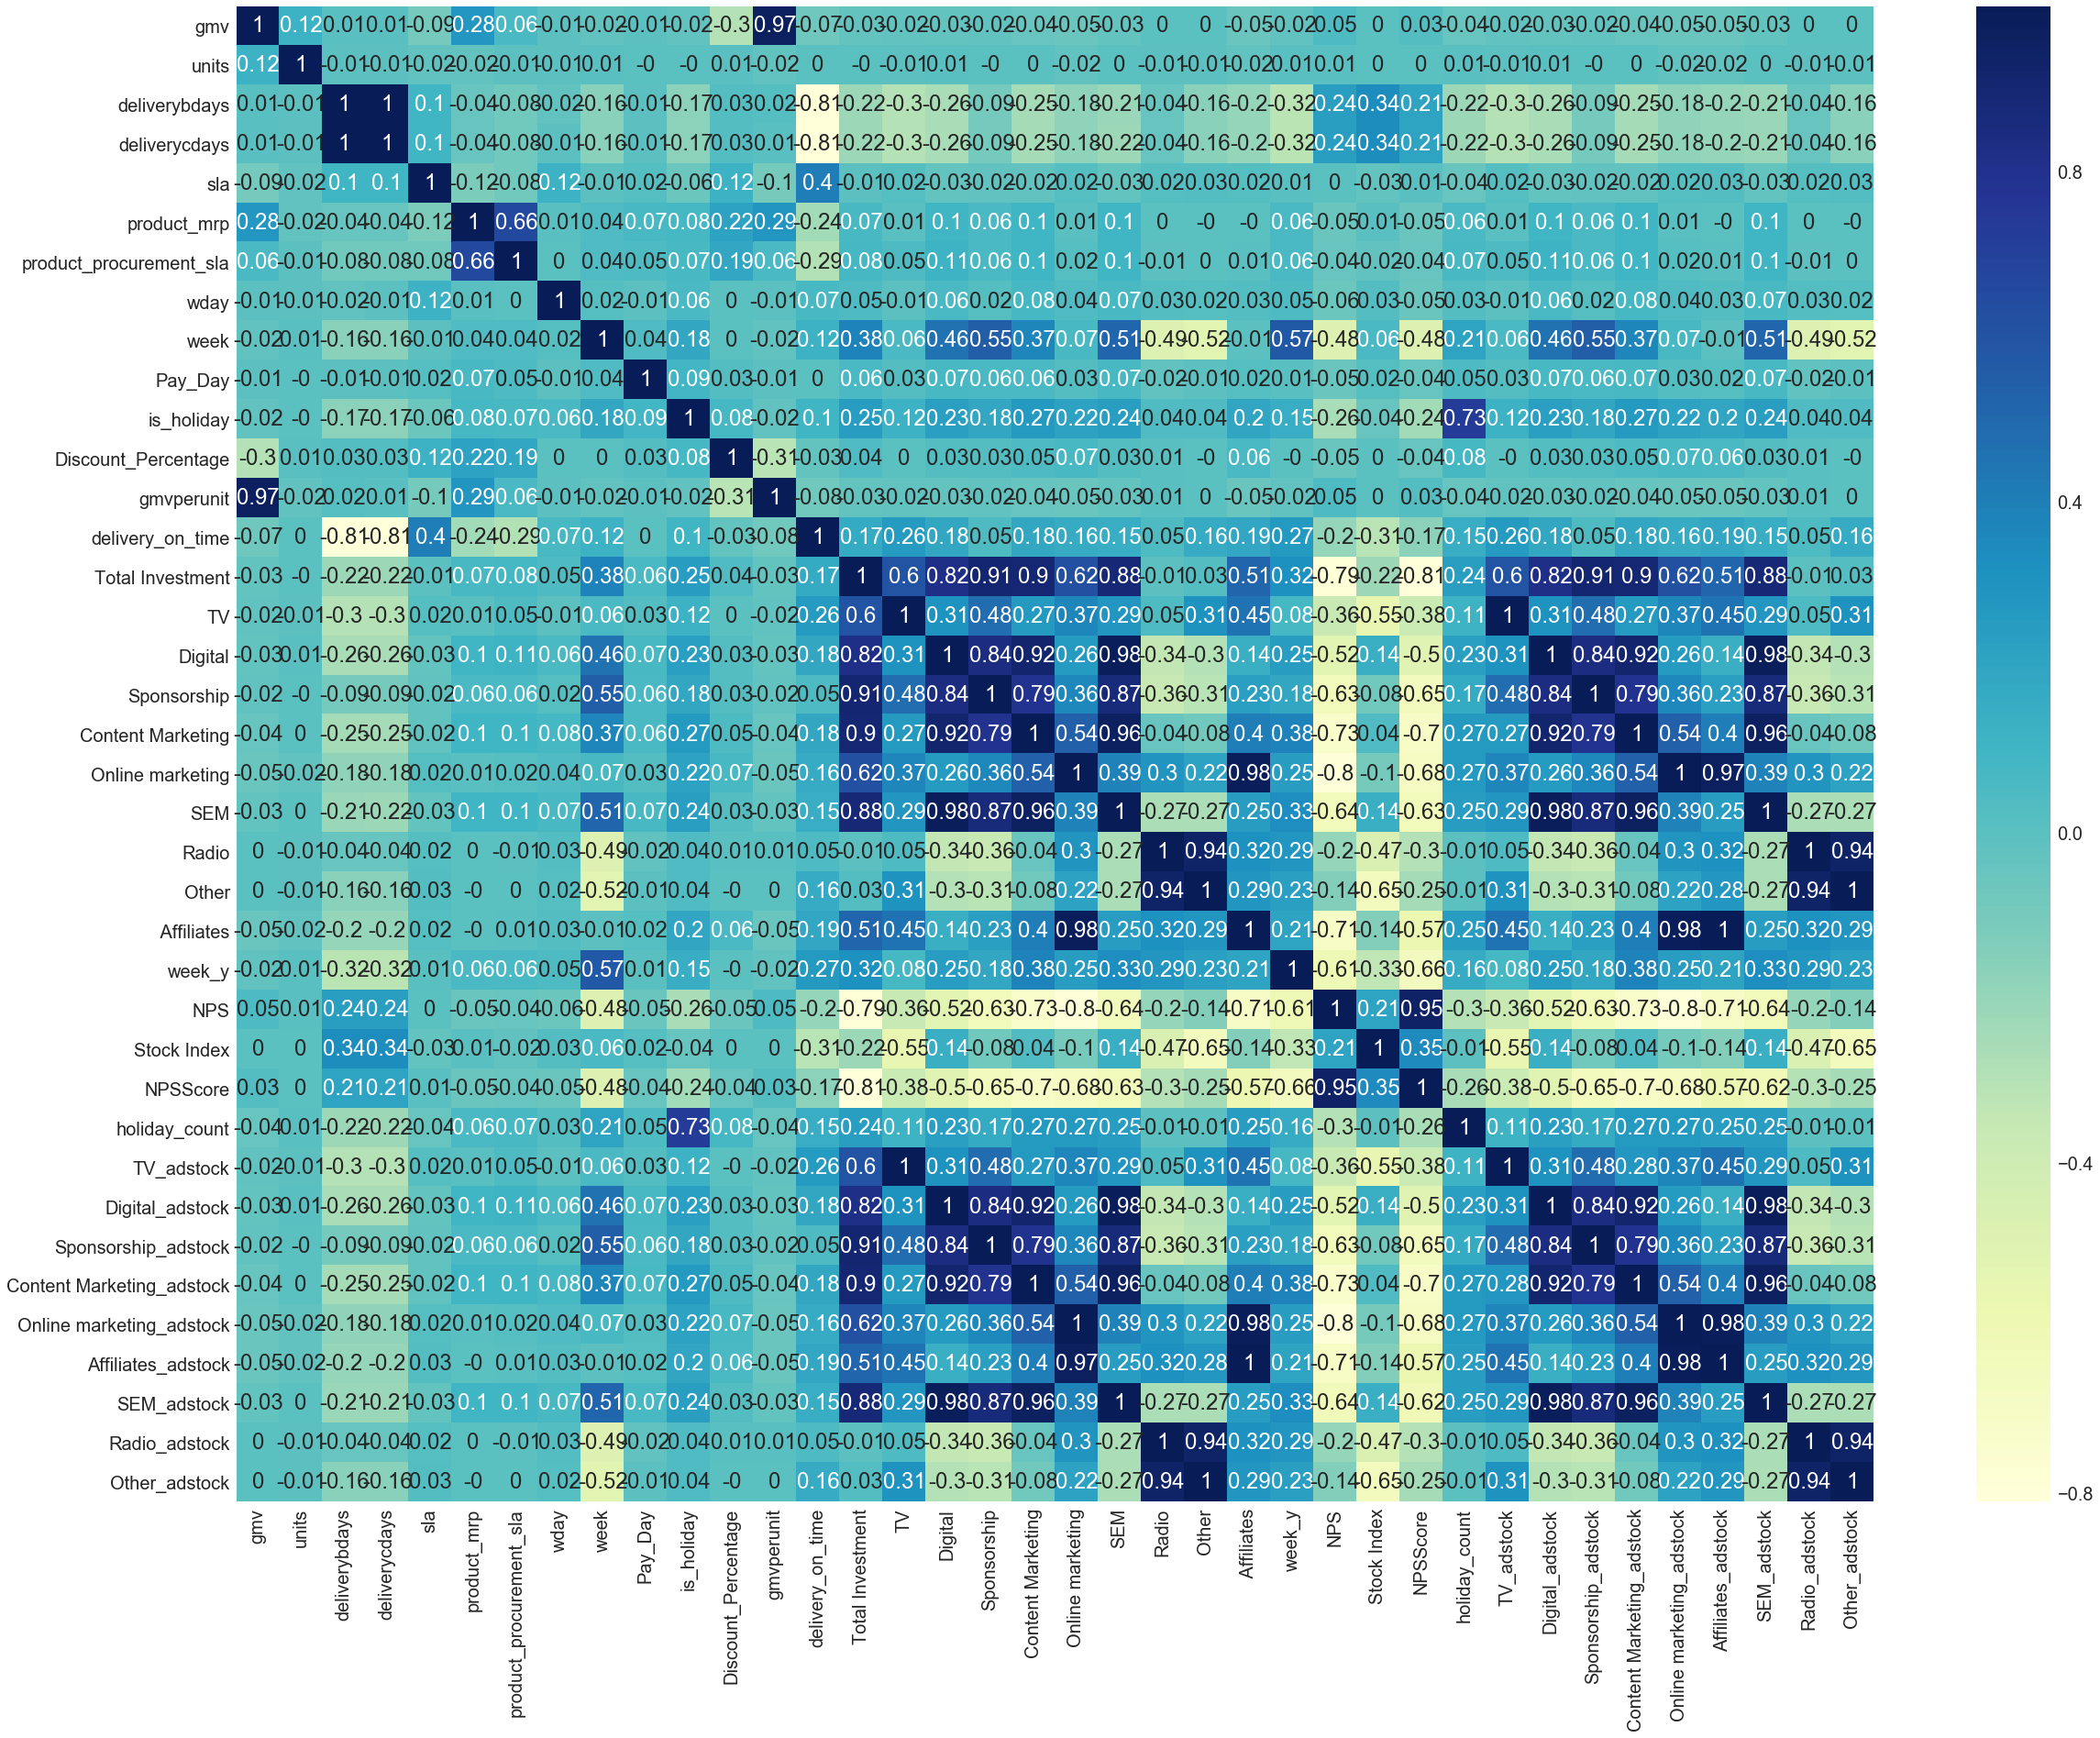

In [7]:
# Plotting a heatmap of the selected variables
plt.figure(figsize=(40, 30))
sns.set(font_scale=2)
sns.heatmap(round(GamingAccessory.corr(), 2), annot=True, cmap="YlGnBu")

In [8]:
GamingAccessory = GamingAccessory.drop(['gmvperunit', 'deliverybdays', 'SEM_adstock', 'Digital_adstock', 
                              'Content Marketing_adstock', 'Affiliates_adstock', 'Radio_adstock', 'Other_adstock', 
                               'Online marketing_adstock', 'Sponsorship_adstock', 'TV_adstock'], axis=1)

GamingAccessory.head()

,gmv,units,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,...,SEM,Radio,Other,Affiliates,week_y,NPS,Stock Index,NPSScore,holiday_count,ItemType
0,"3,075.00",1,0,COD,9,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,0.00,Luxury
1,"2,750.00",1,0,COD,7,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,4.00,Luxury
2,"2,899.00",1,0,Prepaid,5,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,4.00,Luxury
3,"2,609.00",1,0,Prepaid,5,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,4.00,Luxury
4,"2,772.00",1,0,Prepaid,5,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,0.00,Luxury


In [9]:
GamingAccessory.columns

Index(['gmv', 'units', 'deliverycdays', 's1_fact_order_payment_type', 'sla',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla',
       'wday', 'week', 'Pay_Day', 'is_holiday', 'special_sale',
       'Discount_Percentage', 'delivery_on_time', 'delivery_status',
       'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', 'SEM', 'Radio', 'Other', ' Affiliates', 'week_y',
       'NPS', 'Stock Index', 'NPSScore', 'holiday_count', 'ItemType'],
      dtype='object')

In [10]:
GamingAccessory.isnull().sum()

gmv                              0
units                            0
deliverycdays                    0
s1_fact_order_payment_type       0
sla                              0
product_analytic_category        0
product_analytic_sub_category    0
product_analytic_vertical        0
product_mrp                      0
product_procurement_sla          0
wday                             0
week                             0
Pay_Day                          0
is_holiday                       0
special_sale                     0
Discount_Percentage              0
delivery_on_time                 0
delivery_status                  0
Total Investment                 0
TV                               0
Digital                          0
Sponsorship                      0
Content Marketing                0
Online marketing                 0
SEM                              0
Radio                            0
Other                            0
 Affiliates                      0
week_y              

In [11]:
GamingAccessory.rename({" Affiliates": "Affiliates"}, axis=1, inplace=True)

In [12]:
GamingAccessory.shape

(170712, 34)

In [13]:
##describe() function alongwith percentiles parameter to get a spread of the data in the numeric columns
GamingAccessory.describe()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,week,Pay_Day,is_holiday,...,Online marketing,SEM,Radio,Other,Affiliates,week_y,NPS,Stock Index,NPSScore,holiday_count
count,"170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00",...,"170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00"
mean,838.76,1.03,1.33,5.71,"2,021.35",2.56,2.99,24.86,0.07,0.20,...,"43,343,295.63","20,183,731.52","1,172,797.93","11,904,502.32","13,684,660.51",28.02,48.37,"1,158.34",11.11,1.15
std,"1,222.51",0.27,2.64,2.54,"5,389.82",1.79,1.93,16.82,0.25,0.40,...,"13,847,355.77","19,652,221.74","1,964,867.99","20,597,714.25","4,006,399.16",17.13,2.69,87.33,0.77,1.65
min,39.00,1.00,0.00,0.00,120.00,0.00,0.00,1.00,0.00,0.00,...,"291,841.89","5,675,708.40",0.00,0.00,"166,383.18",5.00,44.40,"1,015.00",10.03,0.00
25%,284.00,1.00,0.00,4.00,599.00,2.00,1.00,10.00,0.00,0.00,...,"41,633,783.21","9,846,568.91",0.00,0.00,"14,039,892.47",13.00,47.00,"1,052.00",10.63,0.00
50%,449.00,1.00,0.00,6.00,950.00,2.00,3.00,21.00,0.00,0.00,...,"48,016,056.55","11,763,933.86",0.00,0.00,"15,390,121.96",22.00,47.31,"1,210.00",10.97,0.00
75%,924.00,1.00,0.00,7.00,"1,792.00",3.00,5.00,42.00,0.00,0.00,...,"51,709,677.42","15,603,225.81","1,964,516.13","11,260,967.74","15,605,218.38",44.00,50.33,"1,228.00",12.09,3.00
max,"49,999.00",15.00,42.00,60.00,"65,000.00",14.00,6.00,53.00,1.00,1.00,...,"55,033,046.50","72,093,251.50","6,096,774.19","61,170,967.74","16,641,935.48",53.00,59.99,"1,242.00",13.55,6.00


In [14]:
GamingAccessory['delivery_on_time'].unique()

array([  4.,   2.,   0.,  -1.,   1.,   5.,   6.,   7.,   8.,   9.,  10.,
        13.,   3.,  11.,  16.,  14.,  -3.,  -2.,  17.,  15.,  12., -13.,
       -12.,  -9., -11.,  -8., -10.,  -7.,  -5.,  -4.,  -6.,  19.,  18.,
       -14.,  21., -15., -16., -61., -19.,  20.,  59., -20., -25., -22.,
       -24., -18., -17., -23., -21., -45., -28., -75., -64., -50., -33.,
       -36.,  24., -29., -27., -44., -39., -26., -34., -31., -30., -37.])

In [15]:
GamingAccessory=GamingAccessory.loc[(GamingAccessory['delivery_on_time']>0)]
GamingAccessory.head()

,gmv,units,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,...,SEM,Radio,Other,Affiliates,week_y,NPS,Stock Index,NPSScore,holiday_count,ItemType
0,"3,075.00",1,0,COD,9,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,0.00,Luxury
1,"2,750.00",1,0,COD,7,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,4.00,Luxury
5,"2,750.00",1,0,Prepaid,7,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,4.00,Luxury
7,"3,079.00",1,0,Prepaid,7,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,0.00,Luxury
8,"2,899.00",1,0,COD,6,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,0.00,Luxury


In [16]:
GamingAccessory.shape

(106810, 34)

In [17]:
# Subset all categorical variables
GamingAccessory_categorical = GamingAccessory.select_dtypes(include=['object'])
GamingAccessory_categorical.head()

,s1_fact_order_payment_type,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,special_sale,delivery_status,ItemType
0,COD,GamingHardware,GamingAccessory,GamePad,Regular Day,Early,Luxury
1,COD,GamingHardware,GamingAccessory,GamePad,Regular Day,Early,Luxury
5,Prepaid,GamingHardware,GamingAccessory,GamePad,Daussera,Early,Luxury
7,Prepaid,GamingHardware,GamingAccessory,GamePad,Regular Day,Early,Luxury
8,COD,GamingHardware,GamingAccessory,GamePad,Regular Day,Early,Luxury


In [18]:
# Subset all numerical variables
GamingAccessory_numerical = GamingAccessory.select_dtypes(include=['int64','float64'])
GamingAccessory_numerical.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,week,Pay_Day,is_holiday,...,Online marketing,SEM,Radio,Other,Affiliates,week_y,NPS,Stock Index,NPSScore,holiday_count
0,"3,075.00",1,0,9,"3,999.00",5,6,40,0,0,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,0.00
1,"2,750.00",1,0,7,"3,999.00",5,2,42,0,0,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,4.00
5,"2,750.00",1,0,7,"3,999.00",5,4,42,0,1,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,4.00
7,"3,079.00",1,0,7,"3,999.00",5,5,43,0,0,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,0.00
8,"2,899.00",1,0,6,"3,999.00",5,0,43,0,0,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,0.00


In [19]:
# Convert into dummies
dummies = pd.get_dummies(GamingAccessory_categorical, drop_first=True)
dummies.head()

,s1_fact_order_payment_type_Prepaid,product_analytic_vertical_GameControlMount,product_analytic_vertical_GamePad,product_analytic_vertical_GamingAccessoryKit,product_analytic_vertical_GamingAdapter,product_analytic_vertical_GamingChargingStation,product_analytic_vertical_GamingHeadset,product_analytic_vertical_GamingKeyboard,product_analytic_vertical_GamingMemoryCard,product_analytic_vertical_GamingMouse,...,special_sale_Christmas & New Year,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [20]:
# Drop categorical variable columns
GamingAccessory = GamingAccessory.drop(list(GamingAccessory_categorical.columns), axis=1)

In [21]:
GamingAccessory.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,week,Pay_Day,is_holiday,...,Online marketing,SEM,Radio,Other,Affiliates,week_y,NPS,Stock Index,NPSScore,holiday_count
0,"3,075.00",1,0,9,"3,999.00",5,6,40,0,0,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,0.00
1,"2,750.00",1,0,7,"3,999.00",5,2,42,0,0,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,4.00
5,"2,750.00",1,0,7,"3,999.00",5,4,42,0,1,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,4.00
7,"3,079.00",1,0,7,"3,999.00",5,5,43,0,0,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,0.00
8,"2,899.00",1,0,6,"3,999.00",5,0,43,0,0,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40,44.40,1210,10.03,0.00


In [22]:
# Concatenate dummy variables with X
GA = pd.concat([GamingAccessory, dummies], axis=1)
GA.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,week,Pay_Day,is_holiday,...,special_sale_Christmas & New Year,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
0,"3,075.00",1,0,9,"3,999.00",5,6,40,0,0,...,0,0,0,0,0,0,1,0,0,0
1,"2,750.00",1,0,7,"3,999.00",5,2,42,0,0,...,0,0,0,0,0,0,1,0,0,0
5,"2,750.00",1,0,7,"3,999.00",5,4,42,0,1,...,0,1,0,0,0,0,0,0,0,0
7,"3,079.00",1,0,7,"3,999.00",5,5,43,0,0,...,0,0,0,0,0,0,1,0,0,0
8,"2,899.00",1,0,6,"3,999.00",5,0,43,0,0,...,0,0,0,0,0,0,1,0,0,0


In [23]:
GA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106810 entries, 0 to 170711
Data columns (total 53 columns):
gmv                                                106810 non-null float64
units                                              106810 non-null int64
deliverycdays                                      106810 non-null int64
sla                                                106810 non-null int64
product_mrp                                        106810 non-null float64
product_procurement_sla                            106810 non-null int64
wday                                               106810 non-null int64
week                                               106810 non-null int64
Pay_Day                                            106810 non-null int64
is_holiday                                         106810 non-null int64
Discount_Percentage                                106810 non-null float64
delivery_on_time                                   106810 non-null float64
Total

In [24]:
# missing information
GA.isnull().any()

gmv                                                False
units                                              False
deliverycdays                                      False
sla                                                False
product_mrp                                        False
product_procurement_sla                            False
wday                                               False
week                                               False
Pay_Day                                            False
is_holiday                                         False
Discount_Percentage                                False
delivery_on_time                                   False
Total Investment                                   False
TV                                                 False
Digital                                            False
Sponsorship                                        False
Content Marketing                                  False
Online marketing               

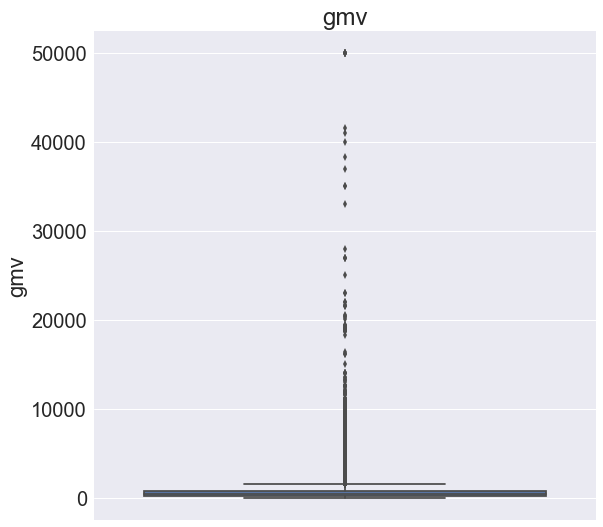

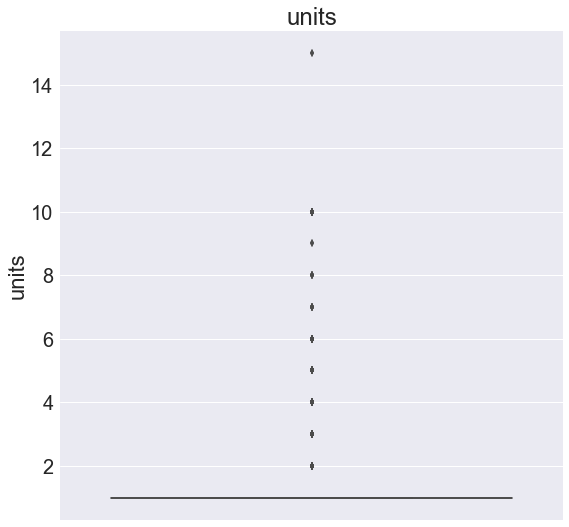

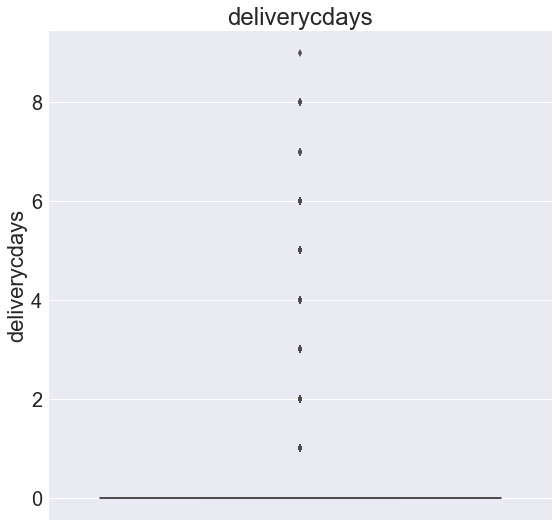

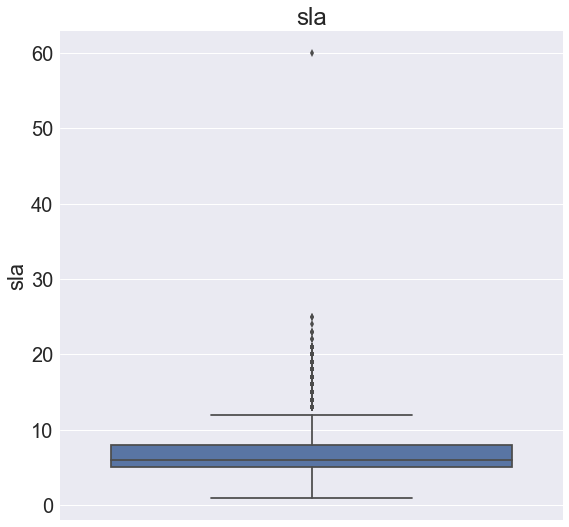

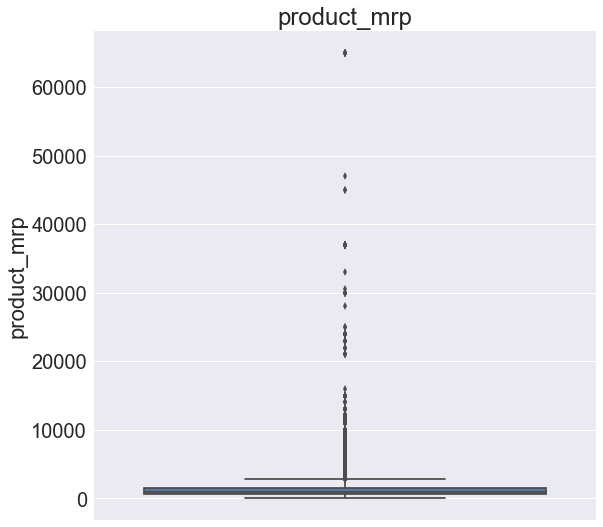

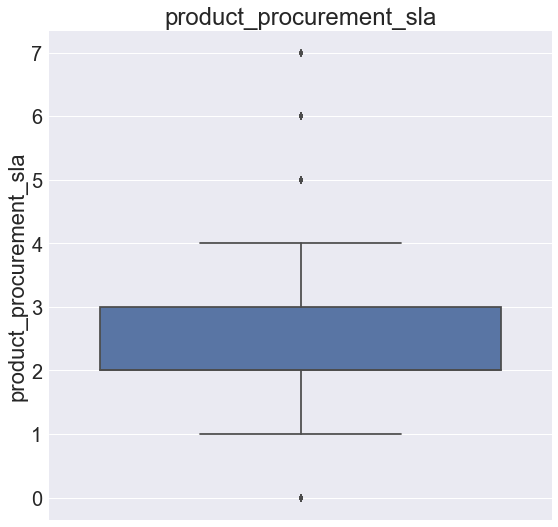

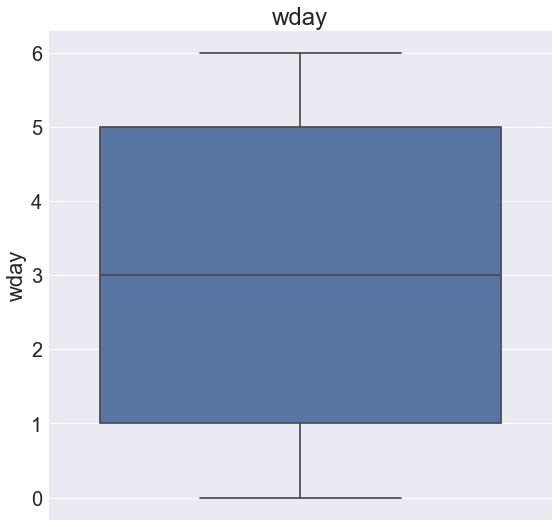

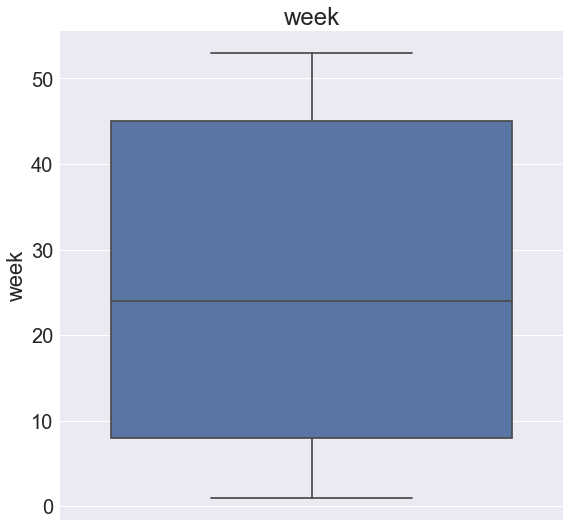

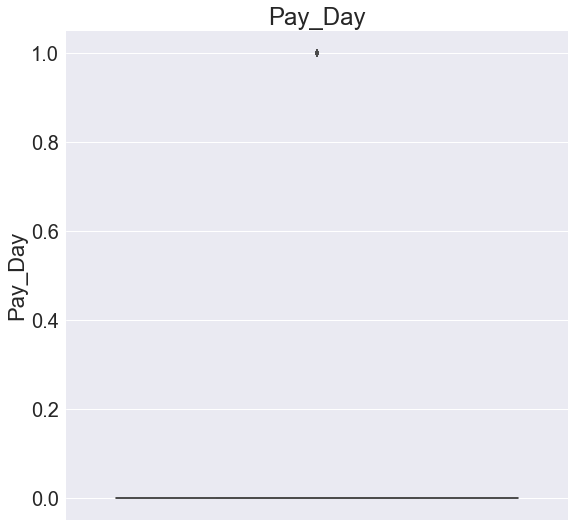

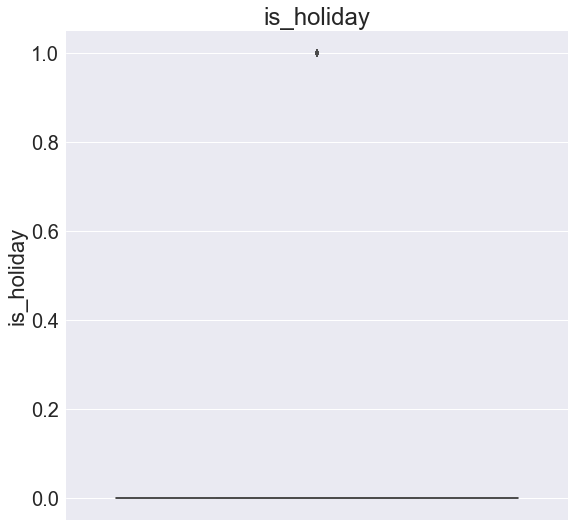

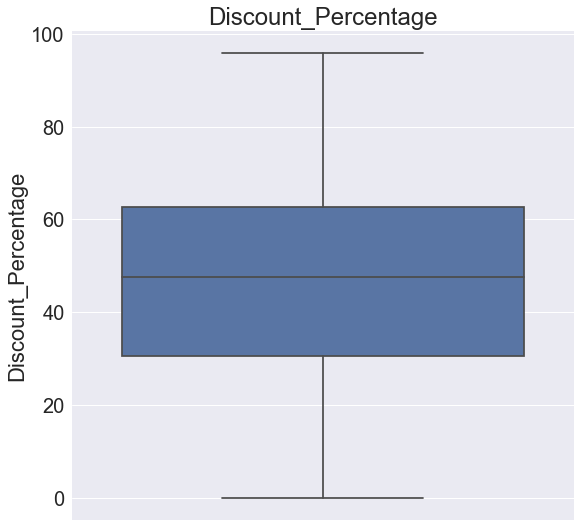

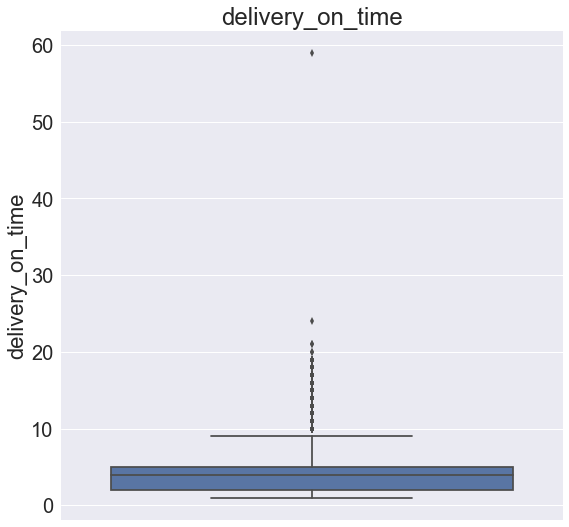

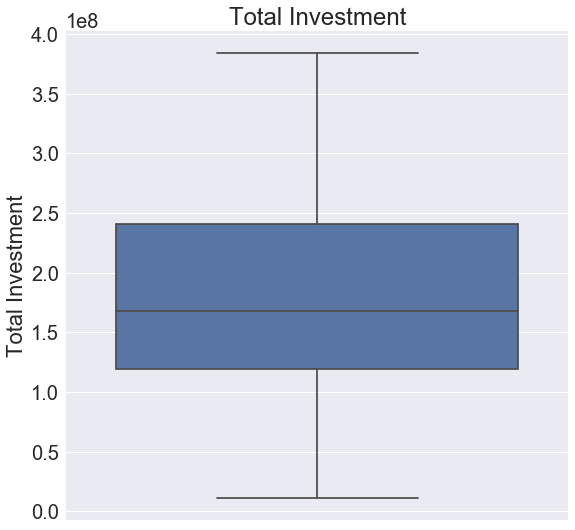

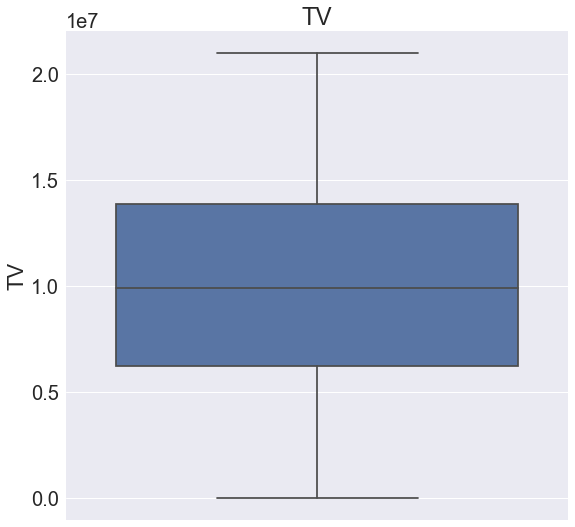

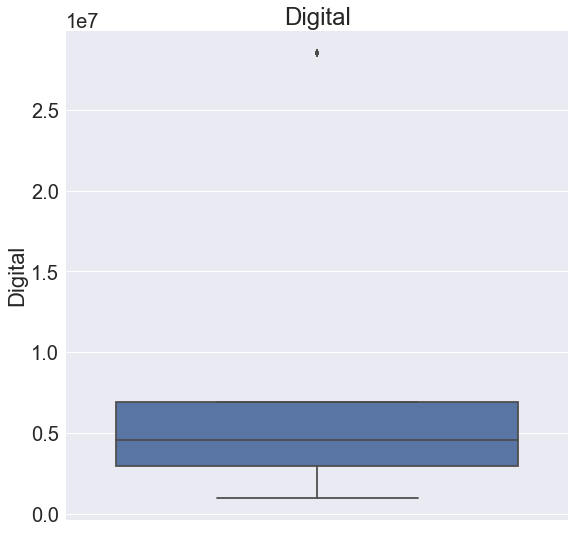

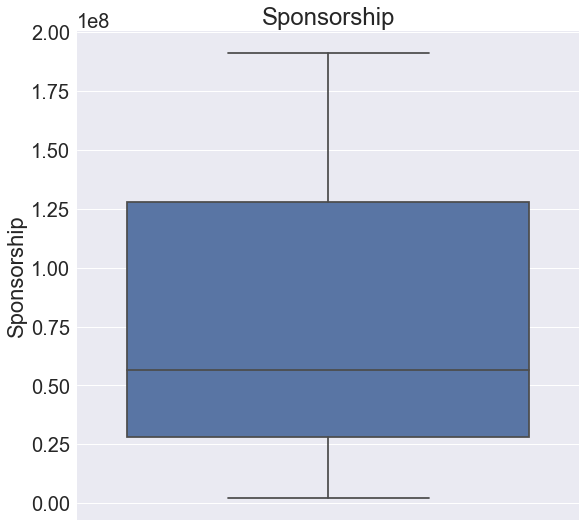

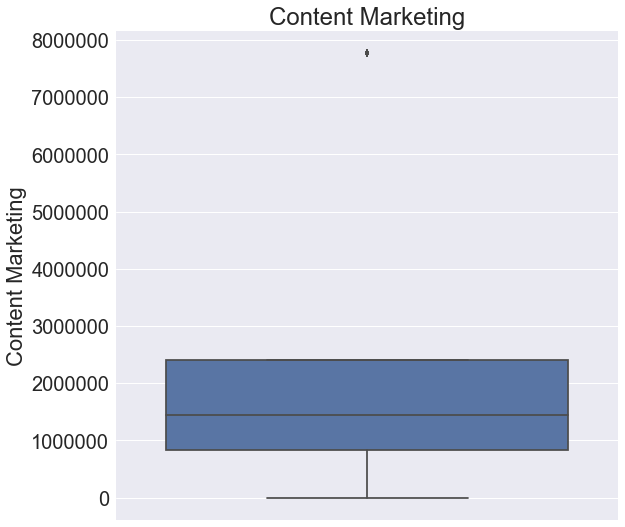

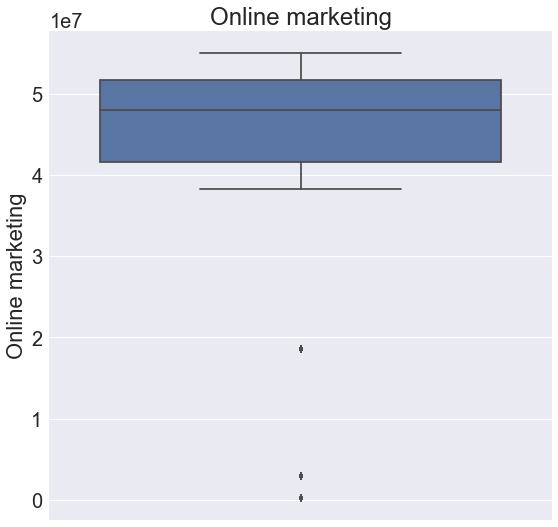

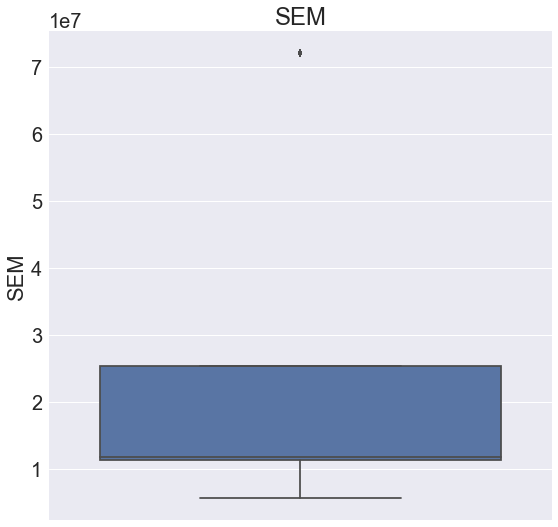

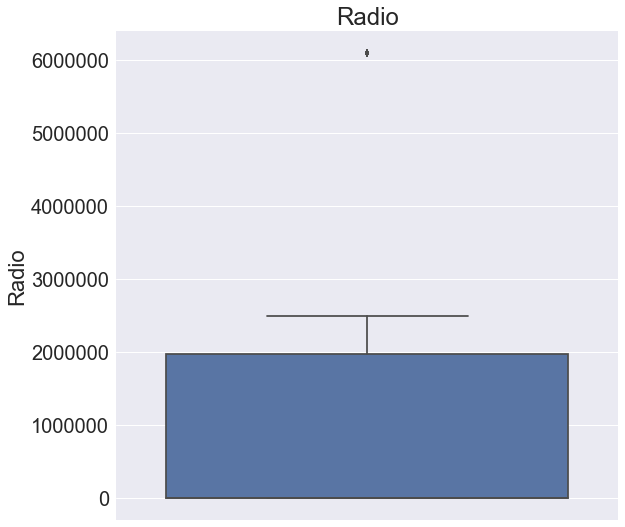

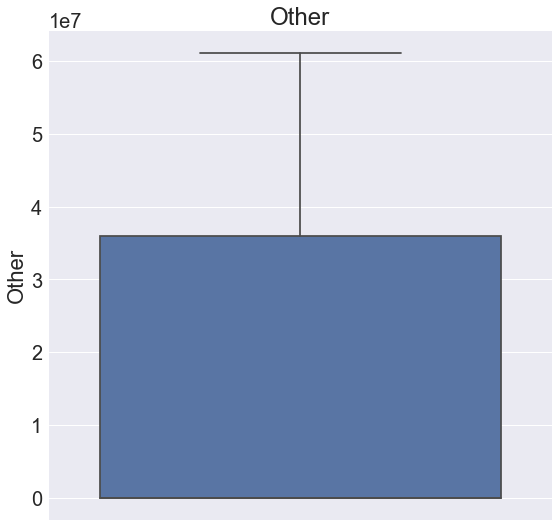

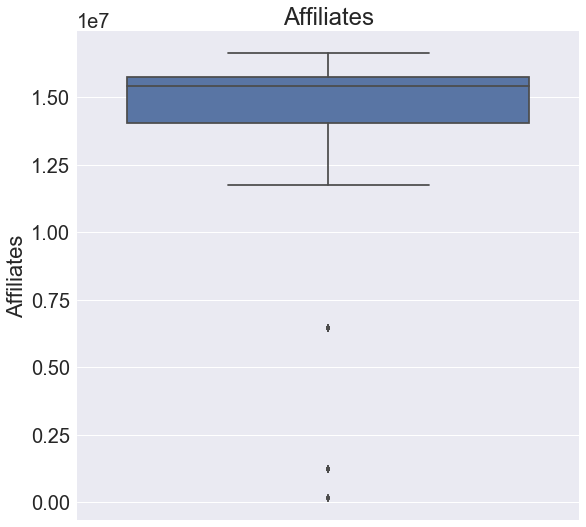

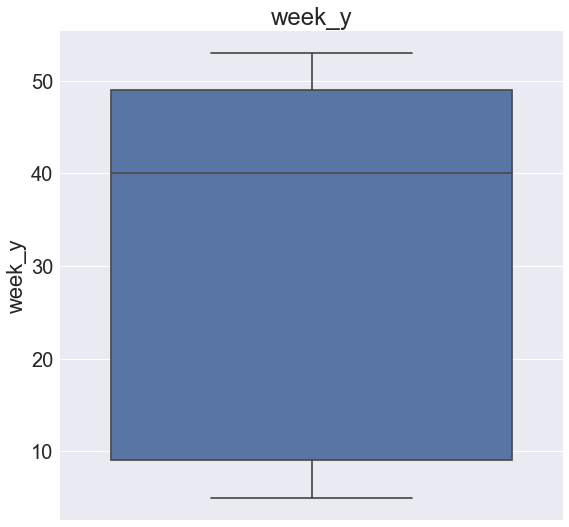

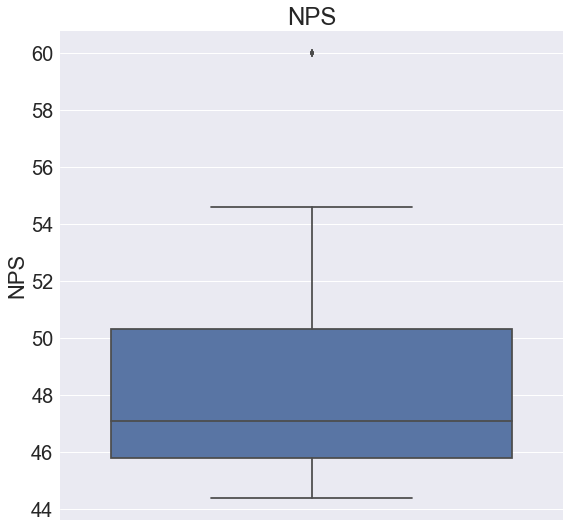

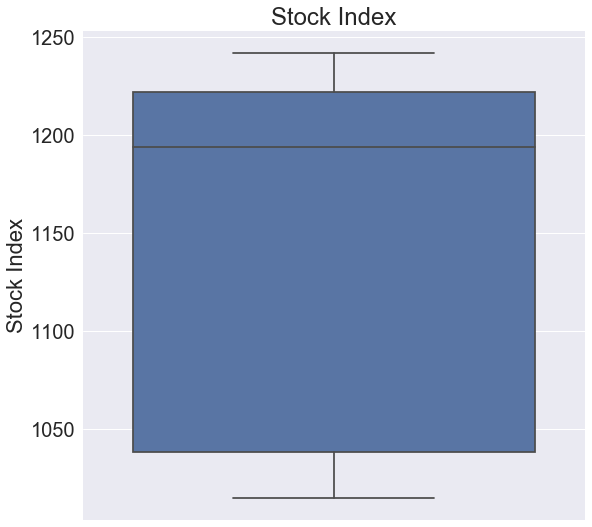

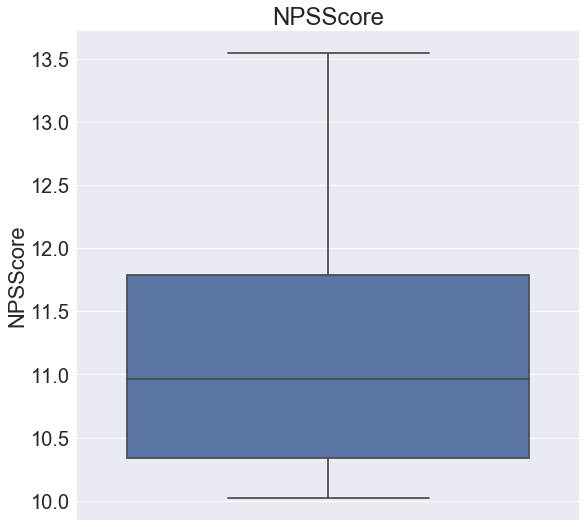

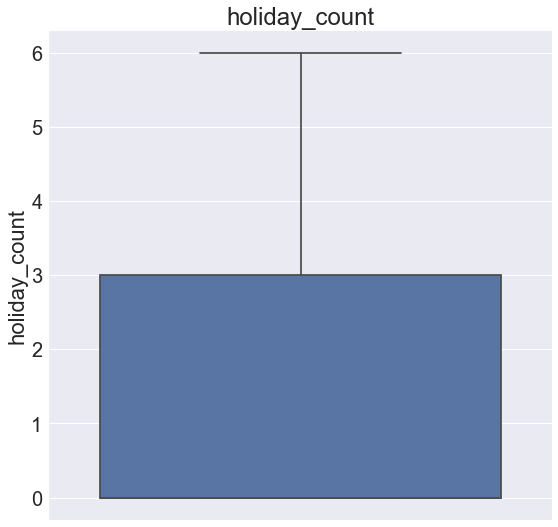

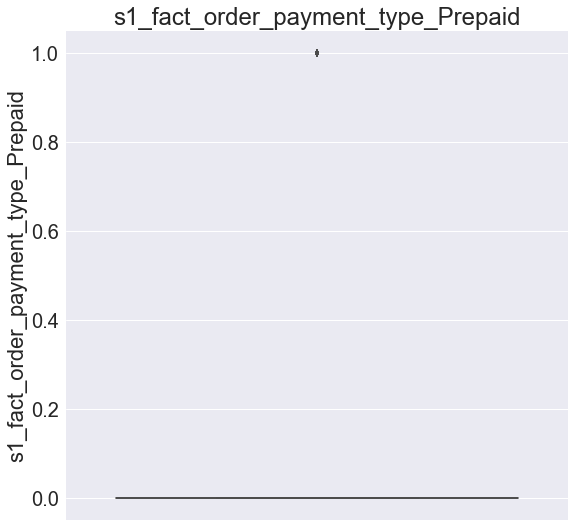

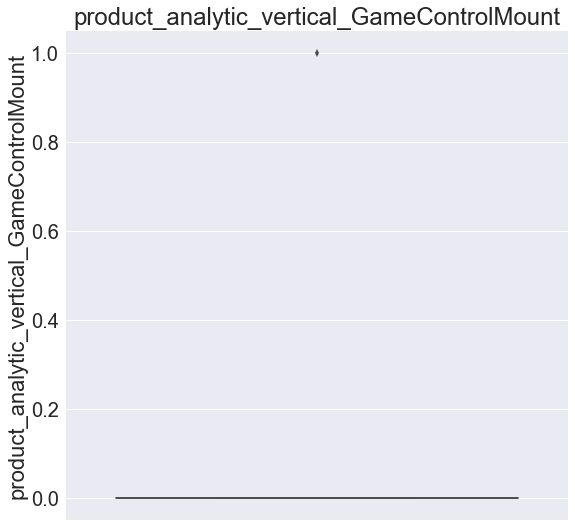

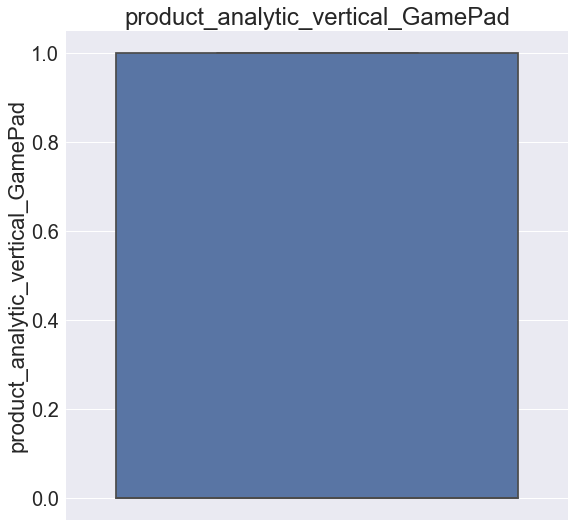

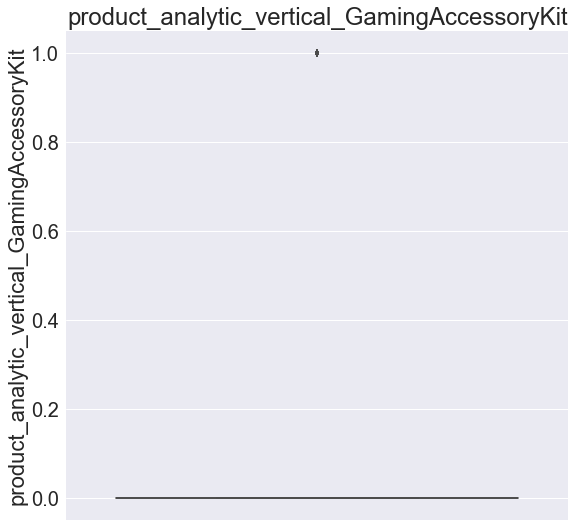

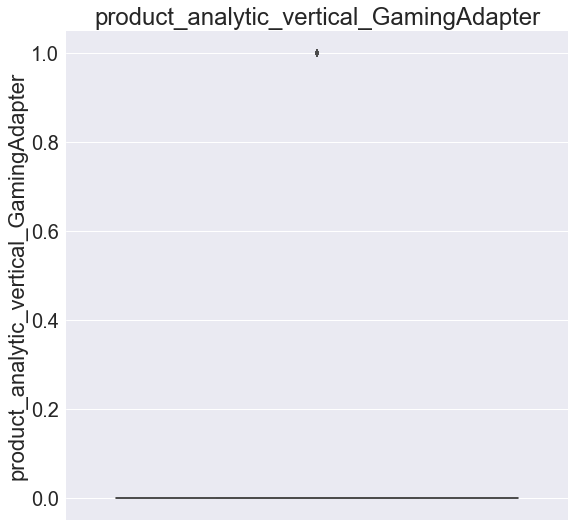

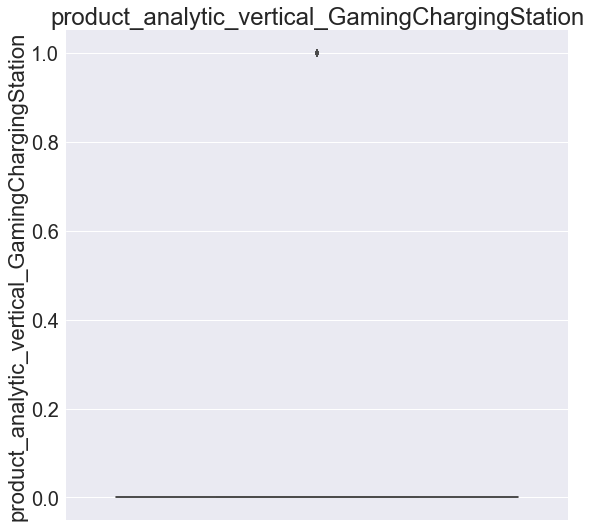

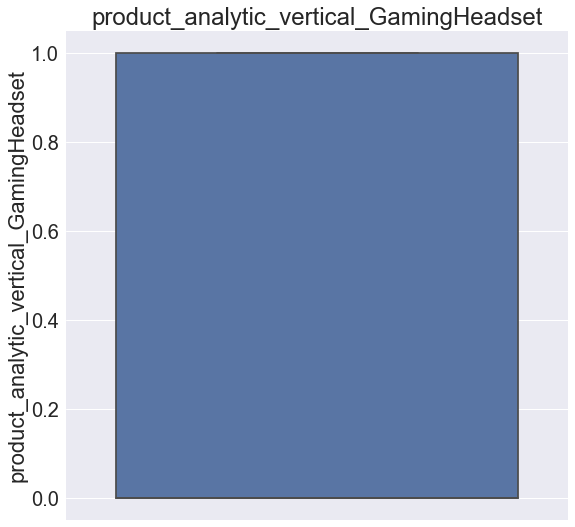

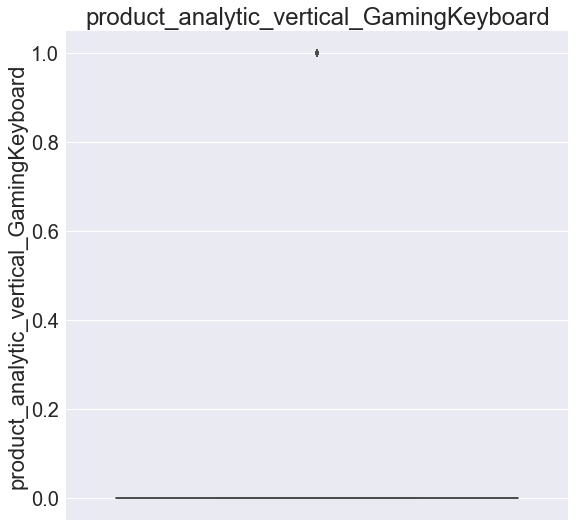

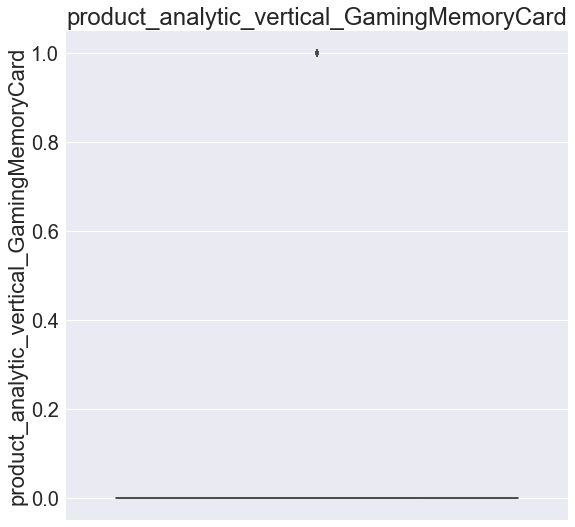

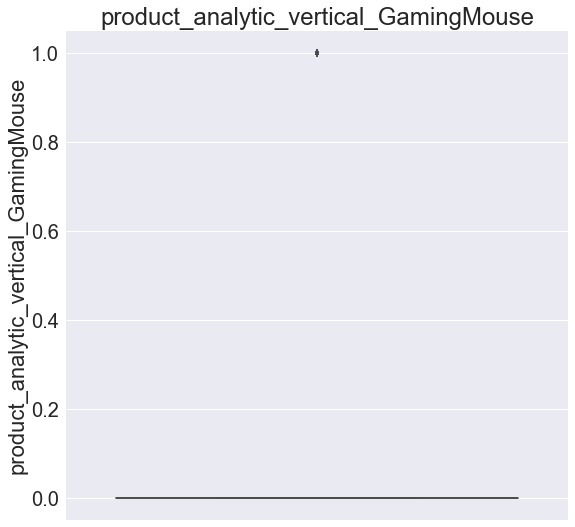

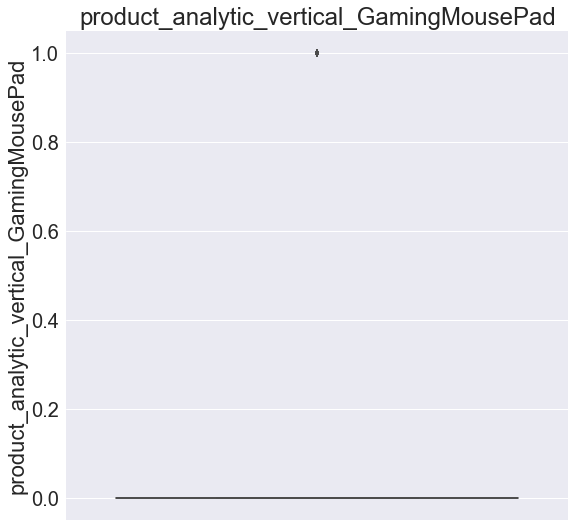

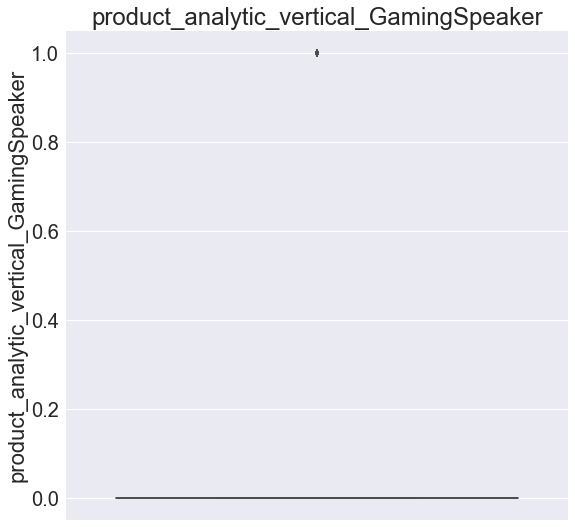

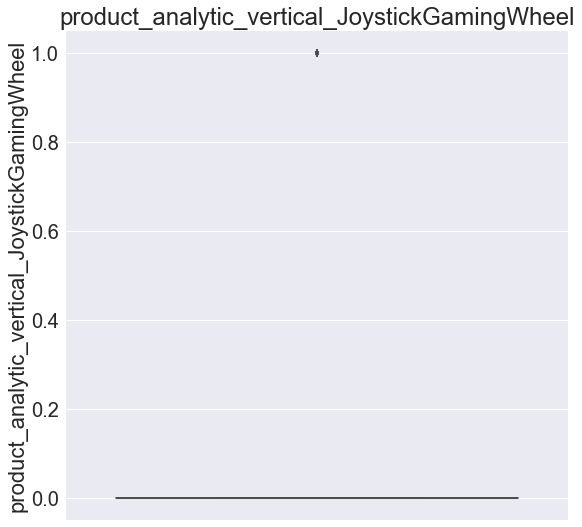

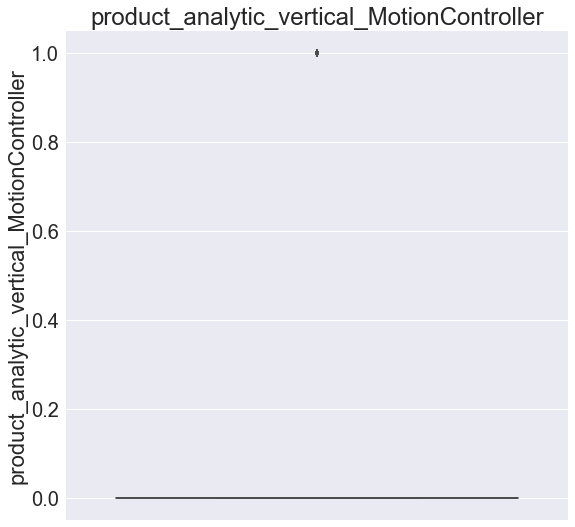

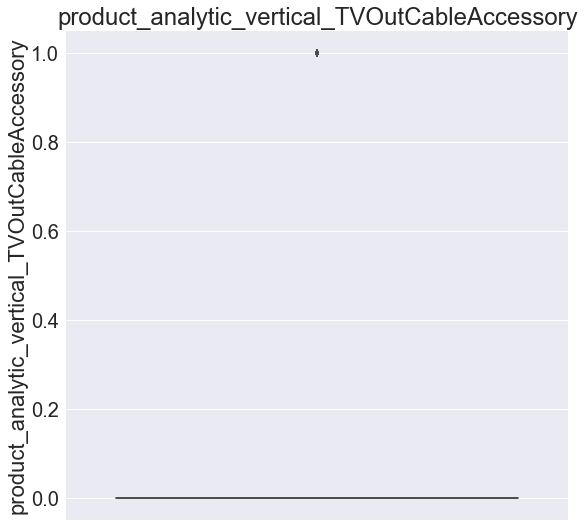

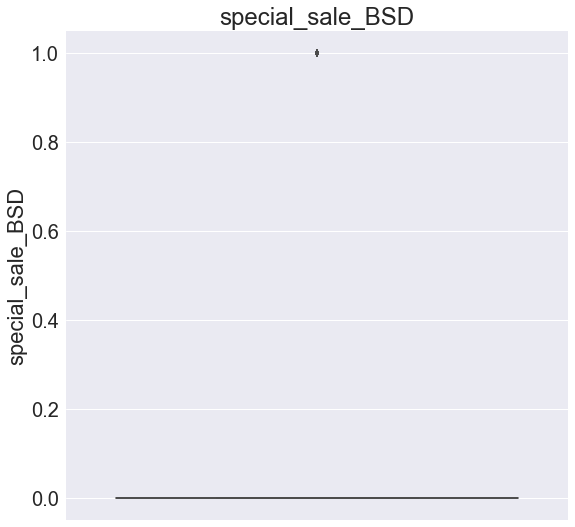

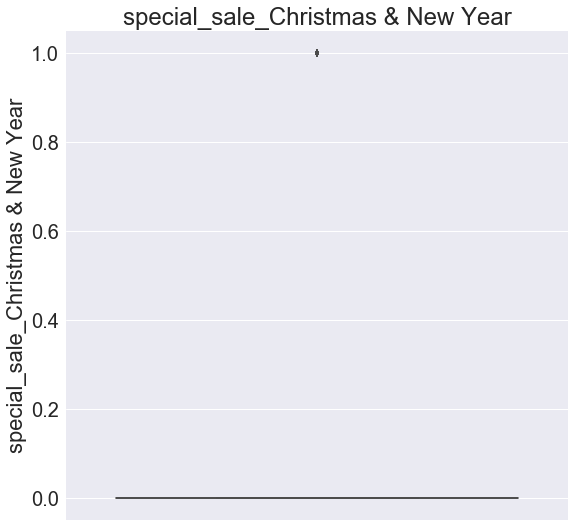

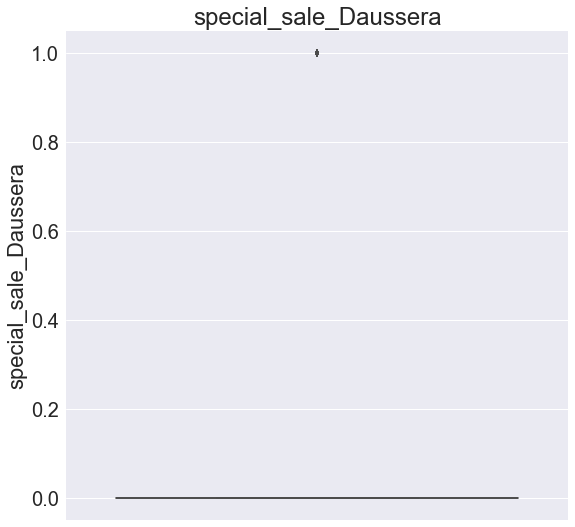

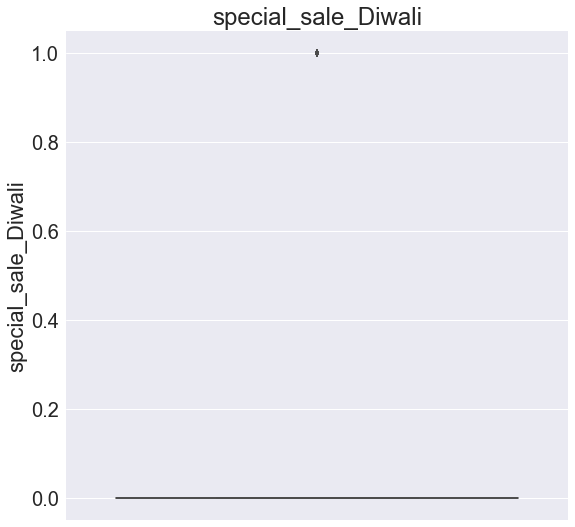

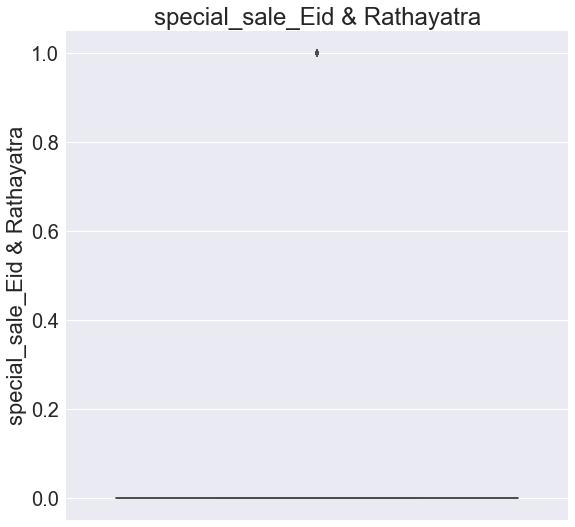

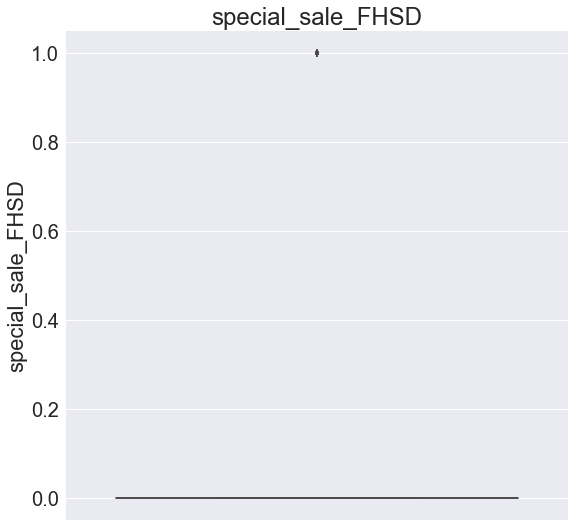

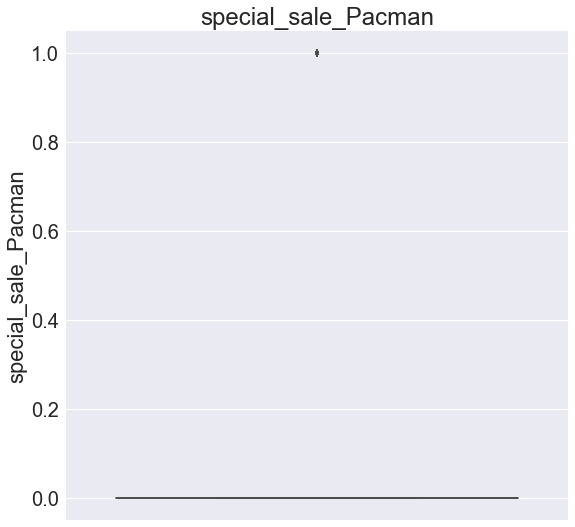

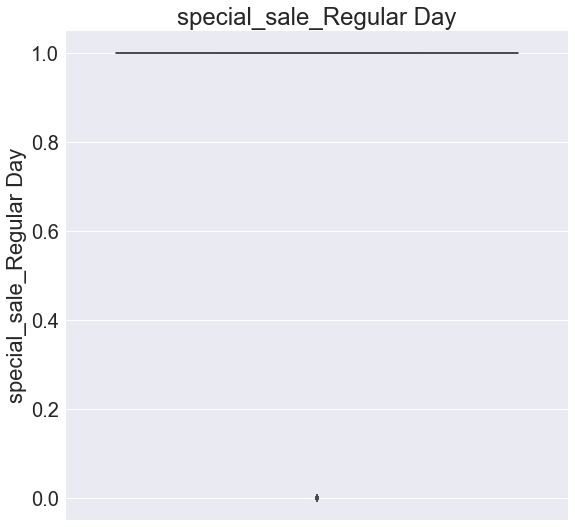

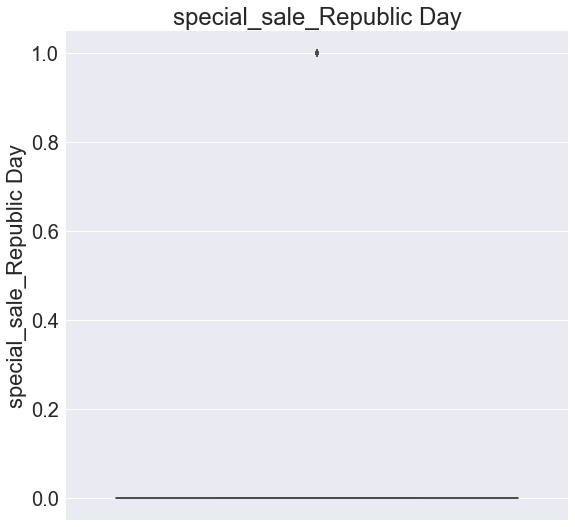

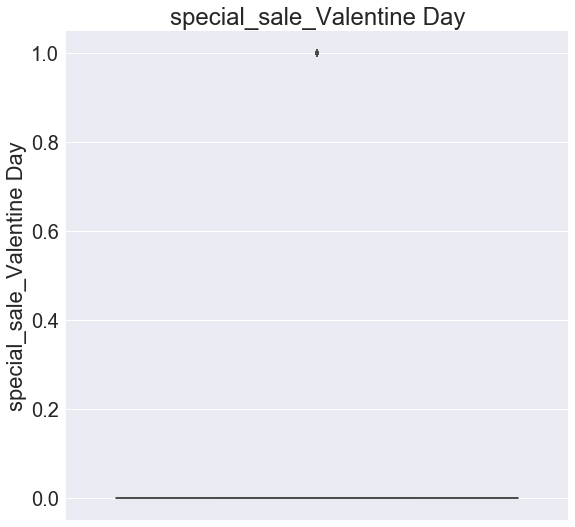

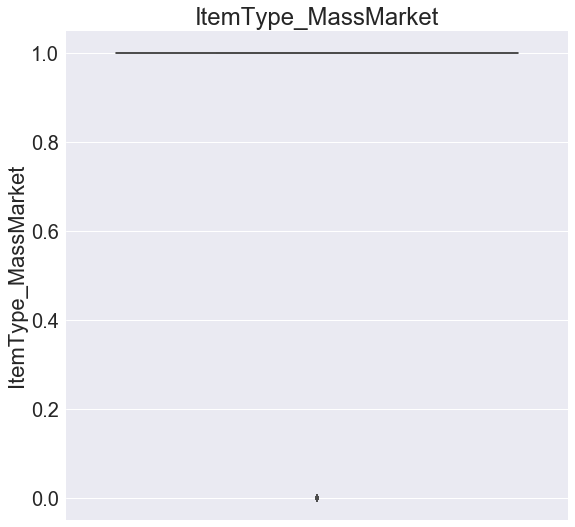

In [25]:
for col in list(GA.columns):
    plt.figure(figsize=(9,9))
    sns.boxplot(data=GA, y=col).set_title(col)
    

In [26]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [27]:
outlier_cols = ['gmv', 'units', 'deliverycdays', 'sla', 'product_mrp', 'delivery_on_time', 
               'Online marketing', 'SEM', 'Affiliates', 'Digital', 'Content Marketing', 'Radio']

In [28]:
    for col in outlier_cols:
        remove_outlier(GA, col)

In [29]:
GA.shape

(106810, 53)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
df_train, df_test = train_test_split(GA, train_size=0.7, test_size=0.3, random_state=100)

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()

In [34]:
GA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106810 entries, 0 to 170711
Data columns (total 53 columns):
gmv                                                106810 non-null float64
units                                              106810 non-null int64
deliverycdays                                      106810 non-null int64
sla                                                106810 non-null int64
product_mrp                                        106810 non-null float64
product_procurement_sla                            106810 non-null int64
wday                                               106810 non-null int64
week                                               106810 non-null int64
Pay_Day                                            106810 non-null int64
is_holiday                                         106810 non-null int64
Discount_Percentage                                106810 non-null float64
delivery_on_time                                   106810 non-null float64
Total

In [35]:
GA['gmv'].unique()

array([3075., 2750., 3079., ..., 7183.,   82.,   42.])

In [36]:
# Create a list of the variables that you need to scale
varlist1 = ['gmv', 'units', 'deliverycdays', 'sla','product_mrp', 'product_procurement_sla', 'wday', 'week',
           'Discount_Percentage', 'delivery_on_time', 'Total Investment', 'TV',
           'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', 'SEM', 'Other', 'Affiliates', 'NPS',
           'NPSScore', 'holiday_count', 'Pay_Day', 'is_holiday']

# 'Pay_Day', 'is_holiday'

In [37]:
# Scale these variables using 'fit_transform'
df_train[varlist1] = scaler.fit_transform(df_train[varlist1])

In [38]:
df_train.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,week,Pay_Day,is_holiday,...,special_sale_Christmas & New Year,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
36102,0.01,0.00,0.00,0.25,0.03,0.71,0.00,0.96,0.00,0.00,...,0,0,0,0,0,0,1,0,0,1
98899,0.02,0.00,0.00,0.12,0.03,0.00,0.17,0.17,0.00,1.00,...,0,0,0,0,0,0,0,0,0,1
93860,0.01,0.07,0.00,0.21,0.00,0.14,0.17,0.21,0.00,0.00,...,0,0,0,0,0,0,1,0,0,1
637,0.01,0.00,0.00,0.29,0.03,0.71,0.67,0.77,0.00,0.00,...,0,0,0,0,0,0,1,0,0,1
41231,0.01,0.00,0.00,0.21,0.02,0.14,0.67,0.98,0.00,1.00,...,1,0,0,0,0,0,0,0,0,1


In [39]:
# Split the train dataset into X and y
y_train = df_train.pop('gmv')
X_train = df_train

In [40]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 1.53890897e-01 -2.12604194e-02  2.88749041e-02  7.84939856e-01
 -5.90221549e-03 -1.01679821e-05  4.36691045e-04  1.82422950e-04
 -7.14353097e-04 -2.57950525e-02 -2.46856639e-02  2.93565374e-03
 -2.09731337e-02  6.26277236e-02  1.98478337e-02 -7.03180207e-02
  1.25724003e-02 -4.19387734e-03  1.72622819e-09  6.46103739e-03
  1.49362745e-02  9.84921718e-05 -2.95013513e-03 -1.03481450e-05
  1.92730247e-02  2.31945951e-05 -7.82727256e-05 -2.35965026e-04
 -1.97669997e-03  6.05013622e-04  1.02656844e-03 -1.11770532e-03
 -4.35602104e-04 -3.70757177e-04  4.29878020e-04 -5.73425420e-04
 -9.90229900e-04 -1.19165280e-02  3.46383640e-03  1.72271922e-03
 -8.86013809e-04  9.12160645e-04 -7.42947048e-04  7.25673250e-04
  7.39902657e-04  1.52487022e-03  8.62948181e-04  1.21024933e-03
 -2.13602460e-04  1.38270775e-03  6.97535320e-04 -1.21000015e-02]
0.008073078846233737


In [42]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(lm, 15)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)  

[ True False  True  True False False False False False  True False  True
 False  True  True  True False  True False  True  True False  True False
  True False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False  True]
[ 1  3  1  1  4 37 25 32 21  1  2  1 10  1  1  1  5  1 38  1  1 34  1 36
  1 35 33 31  8 11  9 22 28 29 14 27 24  1  6  7 26 16 23 19 20 12 17 15
 30 13 18  1]


In [43]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,units,sla,product_mrp,Discount_Percentage,Total Investment,Digital,Sponsorship,Content Marketing,SEM,Other,Affiliates,NPS,NPSScore,product_analytic_vertical_GamingSpeaker,ItemType_MassMarket
36102,1.00,0.00,0.25,0.03,0.72,0.62,0.21,0.67,0.31,0.29,0.00,0.93,0.09,0.09,0,1
98899,1.00,0.00,0.12,0.03,0.47,0.58,0.14,0.48,0.11,0.09,0.59,0.84,0.30,0.30,0,1
93860,1.00,0.07,0.21,0.00,0.33,0.58,0.14,0.48,0.11,0.09,0.59,0.84,0.30,0.30,0,1
637,1.00,0.00,0.29,0.03,0.73,1.00,1.00,1.00,1.00,1.00,0.00,0.95,0.00,0.00,0,1
41231,1.00,0.00,0.21,0.02,0.62,0.62,0.21,0.67,0.31,0.29,0.00,0.93,0.09,0.09,0,1


In [44]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                 4.623e+04
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        19:29:44   Log-Likelihood:             2.6154e+05
No. Observations:               74767   AIC:                        -5.231e+05
Df Residuals:                   74751   BIC:                        -5.229e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
# Creating a function for calculating VIF
def vif_calc(input_data):
    vif = pd.DataFrame()
    X = input_data
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [47]:
# Let's calculate VIF
vif_calc(input_data=X_train_rfe1)

,Features,VIF
5,Total Investment,"2,623,481.82"
7,Sponsorship,"1,263,580.88"
10,Other,"201,047.05"
11,Affiliates,"105,616.15"
9,SEM,"88,132.05"
6,Digital,"67,135.99"
0,const,"34,297.55"
12,NPS,"7,468.46"
13,NPSScore,"7,457.50"
8,Content Marketing,516.14


In [48]:
X_train_rfe1 = X_train_rfe1.drop('Total Investment', axis=1)
lm_2 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                 4.953e+04
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        19:29:45   Log-Likelihood:             2.6154e+05
No. Observations:               74767   AIC:                        -5.230e+05
Df Residuals:                   74752   BIC:                        -5.229e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.0219      0.000     50.750      0.000       0.021       0.023
units                                       0.1517      0.001    106.148      0.000       0.149       0.155
sla                                         0.0005      0.000      1.770      0.077   -5.18e-05       0.001
product_mrp                                 0.7836      0.001    550.164      0.000       0.781       0.786
Discount_Percentage                        -0.0246      0.000   -202.168      0.000      -0.025      -0.024
Digital                                     0.0055      0.002      3.309      0.001       0.002       0.009
Sponsorship                                 0.0002      0.000      0.633      0.527      -0.000       0.001
Content Marketing                          -0.0060      0.001     -6.180      0.000      -0.008      -0.004
SEM                                         0.0009      0.003      0.338      0.736      -0.004       0.006
Other                                       0.0014      0.000      3.472      0.001       0.001       0.002
Affiliates                                  0.0004      0.000      0.836      0.403      -0.001       0.001
NPS                                        -0.0088      0.002     -4.459      0.000      -0.013      -0.005
NPSScore                                    0.0070      0.002      3.949      0.000       0.004       0.010
product_analytic_vertical_GamingSpeaker    -0.0115      0.001    -20.477      0.000      -0.013      -0.010
ItemType_MassMarket                        -0.0122      0.000    -78.662      0.000      -0.013      -0.012
==============================================================================
Omnibus:                    95594.729   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        351308982.892
Skew:                           6.000   Prob(JB):                         0.00
Kurtosis:                     338.597   Cond. No.                         271.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
8,SEM,969.98
5,Digital,399.30
0,const,259.03
12,NPSScore,208.02
11,NPS,159.33
7,Content Marketing,126.91
9,Other,30.58
10,Affiliates,17.24
6,Sponsorship,14.03
14,ItemType_MassMarket,1.80


In [50]:
# X_train_rfe1 = X_train_rfe1.drop('Online marketing', axis=1)
X_train_rfe1 = X_train_rfe1.drop('SEM', axis=1)

lm_3 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                 5.334e+04
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        19:29:47   Log-Likelihood:             2.6154e+05
No. Observations:               74767   AIC:                        -5.231e+05
Df Residuals:                   74753   BIC:                        -5.229e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.0219      0.000     51.764      0.000       0.021       0.023
units                                       0.1517      0.001    106.149      0.000       0.149       0.155
sla                                         0.0005      0.000      1.778      0.075   -4.96e-05       0.001
product_mrp                                 0.7836      0.001    550.409      0.000       0.781       0.786
Discount_Percentage                        -0.0246      0.000   -202.193      0.000      -0.025      -0.024
Digital                                     0.0060      0.000     12.434      0.000       0.005       0.007
Sponsorship                                 0.0001      0.000      0.538      0.591      -0.000       0.001
Content Marketing                          -0.0057      0.000    -12.769      0.000      -0.007      -0.005
Other                                       0.0012      0.000      6.909      0.000       0.001       0.002
Affiliates                                  0.0005      0.000      1.105      0.269      -0.000       0.001
NPS                                        -0.0084      0.002     -5.436      0.000      -0.011      -0.005
NPSScore                                    0.0065      0.001      6.038      0.000       0.004       0.009
product_analytic_vertical_GamingSpeaker    -0.0115      0.001    -20.474      0.000      -0.013      -0.010
ItemType_MassMarket                        -0.0122      0.000    -78.663      0.000      -0.013      -0.012
==============================================================================
Omnibus:                    95595.071   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        351328978.720
Skew:                           6.000   Prob(JB):                         0.00
Kurtosis:                     338.606   Cond. No.                         136.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
0,const,249.62
10,NPS,97.31
11,NPSScore,77.33
5,Digital,34.06
7,Content Marketing,26.92
9,Affiliates,13.77
6,Sponsorship,11.01
8,Other,6.44
13,ItemType_MassMarket,1.80
3,product_mrp,1.71


In [52]:
X_train_rfe1 = X_train_rfe1.drop('const', axis=1)
lm_4 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                 7.278e+04
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        19:29:48   Log-Likelihood:             2.6022e+05
No. Observations:               74767   AIC:                        -5.204e+05
Df Residuals:                   74754   BIC:                        -5.203e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
units                                       0.1527      0.001    105.004      0.000       0.150       0.156
sla                                         0.0026      0.000      9.426      0.000       0.002       0.003
product_mrp                                 0.8042      0.001    578.177      0.000       0.801       0.807
Discount_Percentage                        -0.0246      0.000   -198.153      0.000      -0.025      -0.024
Digital                                     0.0126      0.000     26.539      0.000       0.012       0.014
Sponsorship                                -0.0042      0.000    -16.212      0.000      -0.005      -0.004
Content Marketing                          -0.0076      0.000    -16.755      0.000      -0.008      -0.007
Other                                      -0.0035      0.000    -22.329      0.000      -0.004      -0.003
Affiliates                                  0.0196      0.000     82.699      0.000       0.019       0.020
NPS                                         0.0533      0.001     53.922      0.000       0.051       0.055
NPSScore                                   -0.0308      0.001    -37.785      0.000      -0.032      -0.029
product_analytic_vertical_GamingSpeaker    -0.0121      0.001    -21.240      0.000      -0.013      -0.011
ItemType_MassMarket                        -0.0094      0.000    -63.334      0.000      -0.010      -0.009
==============================================================================
Omnibus:                    85631.478   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        282878207.676
Skew:                           4.798   Prob(JB):                         0.00
Kurtosis:                     304.183   Cond. No.                         90.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
10,NPSScore,114.01
9,NPS,108.09
8,Affiliates,59.36
6,Content Marketing,49.41
4,Digital,49.09
12,ItemType_MassMarket,27.86
5,Sponsorship,23.70
7,Other,6.61
1,sla,6.10
3,Discount_Percentage,6.06


In [54]:
# X_train_rfe1 = X_train_rfe1.drop('Sponsorship', axis=1)
X_train_rfe1 = X_train_rfe1.drop('Digital', axis=1)

lm_5 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                 7.805e+04
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        19:29:50   Log-Likelihood:             2.5987e+05
No. Observations:               74767   AIC:                        -5.197e+05
Df Residuals:                   74755   BIC:                        -5.196e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
units                                       0.1530      0.001    104.713      0.000       0.150       0.156
sla                                         0.0026      0.000      9.461      0.000       0.002       0.003
product_mrp                                 0.8055      0.001    576.809      0.000       0.803       0.808
Discount_Percentage                        -0.0248      0.000   -199.192      0.000      -0.025      -0.025
Sponsorship                                -0.0005      0.000     -2.317      0.020      -0.001   -7.93e-05
Content Marketing                           0.0035      0.000     20.746      0.000       0.003       0.004
Other                                      -0.0040      0.000    -25.104      0.000      -0.004      -0.004
Affiliates                                  0.0165      0.000     79.486      0.000       0.016       0.017
NPS                                         0.0503      0.001     51.022      0.000       0.048       0.052
NPSScore                                   -0.0256      0.001    -32.168      0.000      -0.027      -0.024
product_analytic_vertical_GamingSpeaker    -0.0126      0.001    -21.929      0.000      -0.014      -0.011
ItemType_MassMarket                        -0.0090      0.000    -60.797      0.000      -0.009      -0.009
==============================================================================
Omnibus:                    84226.937   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        269231451.074
Skew:                           4.647   Prob(JB):                         0.00
Kurtosis:                     296.830   Cond. No.                         88.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
9,NPSScore,107.31
8,NPS,106.72
7,Affiliates,45.36
11,ItemType_MassMarket,27.61
4,Sponsorship,16.87
5,Content Marketing,6.98
6,Other,6.54
1,sla,6.10
3,Discount_Percentage,6.04
2,product_mrp,2.55


In [56]:
X_train_rfe1 = X_train_rfe1.drop('Affiliates', axis=1)
lm_6 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 7.798e+04
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        19:29:51   Log-Likelihood:             2.5684e+05
No. Observations:               74767   AIC:                        -5.137e+05
Df Residuals:                   74756   BIC:                        -5.136e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
units                                       0.1550      0.002    101.845      0.000       0.152       0.158
sla                                         0.0073      0.000     25.928      0.000       0.007       0.008
product_mrp                                 0.8576      0.001    667.486      0.000       0.855       0.860
Discount_Percentage                        -0.0245      0.000   -189.179      0.000      -0.025      -0.024
Sponsorship                                 0.0098      0.000     52.692      0.000       0.009       0.010
Content Marketing                           0.0002      0.000      1.237      0.216      -0.000       0.001
Other                                       0.0056      0.000     52.609      0.000       0.005       0.006
NPS                                        -0.0139      0.001    -23.597      0.000      -0.015      -0.013
NPSScore                                    0.0246      0.001     48.805      0.000       0.024       0.026
product_analytic_vertical_GamingSpeaker    -0.0137      0.001    -23.049      0.000      -0.015      -0.013
ItemType_MassMarket                        -0.0015      0.000    -12.936      0.000      -0.002      -0.001
==============================================================================
Omnibus:                    55844.897   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        167590074.844
Skew:                           2.013   Prob(JB):                         0.00
Kurtosis:                     234.905   Cond. No.                         68.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
8,NPSScore,39.71
7,NPS,35.10
10,ItemType_MassMarket,16.52
4,Sponsorship,11.04
5,Content Marketing,6.56
3,Discount_Percentage,6.03
1,sla,5.83
6,Other,2.74
2,product_mrp,1.99
0,units,1.02


In [58]:
X_train_rfe1 = X_train_rfe1.drop('NPS', axis=1)
lm_6 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 8.509e+04
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        19:29:52   Log-Likelihood:             2.5656e+05
No. Observations:               74767   AIC:                        -5.131e+05
Df Residuals:                   74757   BIC:                        -5.130e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
units                                       0.1545      0.002    101.166      0.000       0.151       0.157
sla                                         0.0072      0.000     25.643      0.000       0.007       0.008
product_mrp                                 0.8587      0.001    666.289      0.000       0.856       0.861
Discount_Percentage                        -0.0242      0.000   -187.071      0.000      -0.024      -0.024
Sponsorship                                 0.0079      0.000     46.939      0.000       0.008       0.008
Content Marketing                           0.0018      0.000     11.507      0.000       0.002       0.002
Other                                       0.0043   9.23e-05     46.972      0.000       0.004       0.005
NPSScore                                    0.0136      0.000     72.169      0.000       0.013       0.014
product_analytic_vertical_GamingSpeaker    -0.0138      0.001    -22.989      0.000      -0.015      -0.013
ItemType_MassMarket                        -0.0012      0.000     -9.893      0.000      -0.001      -0.001
==============================================================================
Omnibus:                    54874.641   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        164033158.130
Skew:                           1.940   Prob(JB):                         0.00
Kurtosis:                     232.432   Cond. No.                         67.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
9,ItemType_MassMarket,16.23
4,Sponsorship,8.86
3,Discount_Percentage,5.98
1,sla,5.83
5,Content Marketing,5.53
7,NPSScore,5.47
6,Other,2.04
2,product_mrp,1.99
0,units,1.02
8,product_analytic_vertical_GamingSpeaker,1.01


In [60]:
X_train_rfe1 = X_train_rfe1.drop('Sponsorship', axis=1)
lm_6 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 9.160e+04
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        19:29:53   Log-Likelihood:             2.5548e+05
No. Observations:               74767   AIC:                        -5.109e+05
Df Residuals:                   74758   BIC:                        -5.109e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
units                                       0.1554      0.002    100.313      0.000       0.152       0.158
sla                                         0.0088      0.000     31.063      0.000       0.008       0.009
product_mrp                                 0.8772      0.001    704.743      0.000       0.875       0.880
Discount_Percentage                        -0.0241      0.000   -183.646      0.000      -0.024      -0.024
Content Marketing                           0.0066      0.000     53.668      0.000       0.006       0.007
Other                                       0.0022   8.21e-05     27.408      0.000       0.002       0.002
NPSScore                                    0.0100      0.000     57.433      0.000       0.010       0.010
product_analytic_vertical_GamingSpeaker    -0.0144      0.001    -23.749      0.000      -0.016      -0.013
ItemType_MassMarket                         0.0013      0.000     11.781      0.000       0.001       0.001
==============================================================================
Omnibus:                    46056.368   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        151073686.658
Skew:                           1.284   Prob(JB):                         0.00
Kurtosis:                     223.199   Cond. No.                         64.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
8,ItemType_MassMarket,13.10
3,Discount_Percentage,5.97
1,sla,5.74
6,NPSScore,4.60
4,Content Marketing,3.24
2,product_mrp,1.80
5,Other,1.57
0,units,1.02
7,product_analytic_vertical_GamingSpeaker,1.01


In [62]:
X_train_rfe1 = X_train_rfe1.drop('sla', axis=1)
lm_6 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 1.016e+05
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        19:29:53   Log-Likelihood:             2.5500e+05
No. Observations:               74767   AIC:                        -5.100e+05
Df Residuals:                   74759   BIC:                        -5.099e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
units                                       0.1550      0.002     99.400      0.000       0.152       0.158
product_mrp                                 0.8844      0.001    718.639      0.000       0.882       0.887
Discount_Percentage                        -0.0236      0.000   -180.047      0.000      -0.024      -0.023
Content Marketing                           0.0071      0.000     57.656      0.000       0.007       0.007
Other                                       0.0025   8.21e-05     30.680      0.000       0.002       0.003
NPSScore                                    0.0108      0.000     62.314      0.000       0.010       0.011
product_analytic_vertical_GamingSpeaker    -0.0142      0.001    -23.323      0.000      -0.015      -0.013
ItemType_MassMarket                         0.0025      0.000     24.296      0.000       0.002       0.003
==============================================================================
Omnibus:                    43109.636   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        145648041.143
Skew:                           1.072   Prob(JB):                         0.00
Kurtosis:                     219.213   Cond. No.                         63.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
7,ItemType_MassMarket,11.44
2,Discount_Percentage,5.88
5,NPSScore,4.50
3,Content Marketing,3.19
1,product_mrp,1.74
4,Other,1.55
0,units,1.02
6,product_analytic_vertical_GamingSpeaker,1.01


In [64]:
X_train_rfe1 = X_train_rfe1.drop('ItemType_MassMarket', axis=1)
lm_7 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                 1.151e+05
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        19:29:54   Log-Likelihood:             2.5470e+05
No. Observations:               74767   AIC:                        -5.094e+05
Df Residuals:                   74760   BIC:                        -5.093e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
units                                       0.1558      0.002     99.577      0.000       0.153       0.159
product_mrp                                 0.8747      0.001    748.258      0.000       0.872       0.877
Discount_Percentage                        -0.0218      0.000   -199.860      0.000      -0.022      -0.022
Content Marketing                           0.0090   9.64e-05     93.255      0.000       0.009       0.009
Other                                       0.0033   7.63e-05     42.947      0.000       0.003       0.003
NPSScore                                    0.0137      0.000    105.136      0.000       0.013       0.014
product_analytic_vertical_GamingSpeaker    -0.0140      0.001    -22.825      0.000      -0.015      -0.013
==============================================================================
Omnibus:                    44506.146   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        141584071.769
Skew:                           1.181   Prob(JB):                         0.00
Kurtosis:                     216.173   Cond. No.                         37.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
2,Discount_Percentage,4.05
5,NPSScore,2.49
3,Content Marketing,1.94
1,product_mrp,1.56
4,Other,1.33
0,units,1.02
6,product_analytic_vertical_GamingSpeaker,1.01


In [66]:
# Predicting using the 12th model
y_train_price = lm_7.predict(X_train_rfe1)

C:\Users\aingale\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'errors')

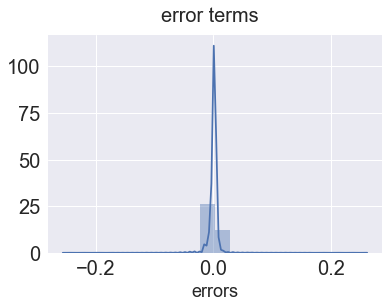

In [67]:
# lets plot an histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('error terms', fontsize = 20) 
plt.xlabel('errors', fontsize = 18)  

In [68]:
df_test[varlist1] = scaler.transform(df_test[varlist1])

In [69]:
# Split the 'df_test' set into X and y
y_test = df_test.pop('gmv')
X_test = df_test

In [70]:
# Let's check the list 'col2' which had the 10 variables RFE had selected
X_test_rfe2 = X_test[col1]

In [71]:
X_test_rfe2.columns

Index(['units', 'sla', 'product_mrp', 'Discount_Percentage',
       'Total Investment', 'Digital', 'Sponsorship', 'Content Marketing',
       'SEM', 'Other', 'Affiliates', 'NPS', 'NPSScore',
       'product_analytic_vertical_GamingSpeaker', 'ItemType_MassMarket'],
      dtype='object')

In [72]:
X_train_rfe1.columns

Index(['units', 'product_mrp', 'Discount_Percentage', 'Content Marketing',
       'Other', 'NPSScore', 'product_analytic_vertical_GamingSpeaker'],
      dtype='object')

In [73]:
# Let's now drop the variables we had manually eliminated as well
#X_test_rfe2 =X_test_rfe2[col]
X_test = df_test
X_test_rfe2 = X_test_rfe2[X_train_rfe1.columns]

In [74]:
X_test_rfe2.columns

Index(['units', 'product_mrp', 'Discount_Percentage', 'Content Marketing',
       'Other', 'NPSScore', 'product_analytic_vertical_GamingSpeaker'],
      dtype='object')

In [75]:
# Add a constant to the test set created
#X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32043 entries, 68104 to 66491
Data columns (total 7 columns):
units                                      32043 non-null float64
product_mrp                                32043 non-null float64
Discount_Percentage                        32043 non-null float64
Content Marketing                          32043 non-null float64
Other                                      32043 non-null float64
NPSScore                                   32043 non-null float64
product_analytic_vertical_GamingSpeaker    32043 non-null uint8
dtypes: float64(6), uint8(1)
memory usage: 1.7 MB


In [76]:
# Making predictions
y_pred = lm_7.predict(X_test_rfe2)

In [77]:
print(X_test_rfe2.shape)
print(X_train_rfe1.shape)

(32043, 7)
(74767, 7)


Text(0,0.5,'y_pred')

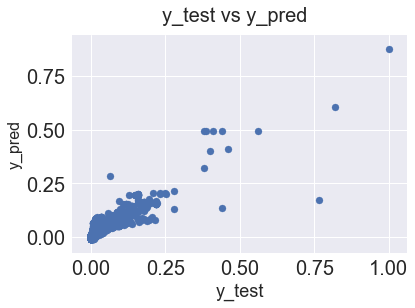

In [78]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [79]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8668431524521573

In [80]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [81]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

0.008117245970728089

In [82]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
import numpy as np

In [83]:
regr = LinearRegression() 
  
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [84]:
regr.score(X_test, y_test)

0.8931871888389495

In [85]:
scores = cross_val_score(regr, X_train, y_train, cv = 5)    #cv is the number of folds, scores will give an array of scores

print('Cross Validation scores: ', scores)

print('Mean and std deviation: ', np.mean(scores), np.std(scores))

#To get predictions (y_hat) and check them all in one using cross validation

predictions = cross_val_predict(regr, X_test, y_test, cv = 5)     #y_test is needed here in predictions to get scores for each fold of cv

accuracy = metrics.r2_score(y_test, predictions)  #this says the accuracy of the predictions from the best cv fold


#If this is good, continue to fit the model on the data


regr.fit(X_train, y_train)

y_hat = regr.predict(X_test)      #this gives me my predictions

regr.score(X_test, y_test)  

Cross Validation scores:  [0.90966099 0.90620648 0.88770264 0.90105719 0.90827047]
Mean and std deviation:  0.9025795552961929 0.007991593903117274


0.8931871888389495

In [86]:
accuracy

0.8899436609430075

In [87]:
scores

array([0.90966099, 0.90620648, 0.88770264, 0.90105719, 0.90827047])

In [88]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
0.9010994508210767
0.01


In [89]:
from scipy.stats import uniform as sp_rand
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'alpha': sp_rand()}
# create and fit a ridge regression model, testing random alpha values
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
rsearch.fit(X_train, y_train)
print(rsearch)
# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
          fit_params=None, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000186B535C9E8>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)
0.9011009842146922
0.03590306285304523


In [90]:
# model with optimal alpha
lm = Ridge(alpha=0.01)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9046193131392439
0.8931951108491658


In [92]:
rmse = sqrt(mean_squared_error(y_test_pred, y_test))

print(rmse)

0.007269800963387996
